In [9]:
# !pip uninstall -y numpy pandas
# !pip install numpy pandas --upgrade --force-reinstall

In [10]:
myvars = {}
with open("gkarutur-mysql-password") as myfile:
    for line in myfile:
        name, var = line.partition(":")[::2]
        myvars[name.strip()] = var.strip()

In [11]:
myvars.keys()

dict_keys(['DB username', 'DB databasename', 'DB password'])

In [12]:
import MySQLdb
conn = MySQLdb.connect(host="localhost", user=myvars['DB username'], passwd=myvars['DB password'], db=myvars['DB databasename'])
cursor = conn.cursor()

In [13]:
cursor.execute("USE I501_Spring2025_Sec27856_group04_db")
print("Database changed successfully!")

# Optional: confirm
cursor.execute("SELECT DATABASE()")
print("Now using:", cursor.fetchone())

Database changed successfully!
Now using: ('I501_Spring2025_Sec27856_group04_db',)


In [14]:
cursor.execute('select * FROM intro_project_dataset'); 

rows_table1 = cursor.fetchall()

cursor.execute('select * FROM intro_project_dataset_2'); 

rows_table2 = cursor.fetchall()

In [15]:
print("Rows in intro_project_dataset:", len(rows_table1))
print("Rows in intro_project_dataset_2:", len(rows_table2))

Rows in intro_project_dataset: 1822
Rows in intro_project_dataset_2: 1822


In [16]:
import pandas as pd

pd.set_option('display.max_rows', None)

cursor.execute('SELECT * FROM intro_project_dataset')
rows_table1 = cursor.fetchall()
columns_table1 = [desc[0] for desc in cursor.description]
df1 = pd.DataFrame(rows_table1, columns=columns_table1)

print("Full Dataset 1:")
display(df1.head())

Full Dataset 1:


,COL 1,COL 2,COL 3,COL 4,COL 5,COL 6,COL 7,COL 8,COL 9,COL 10,COL 11,COL 12,COL 13
0,Patient ID #,Plasma sample ID #,Primary tumor sample ID #,Age,Sex,Race,Tumor type,AJCC Stage,Histopathology,Plasma volume (mL),Plasma DNA concentration (ng/mL),CancerSEEK Logistic Regression Score,CancerSEEK Test Result
1,CRC 455,CRC 455 PLS 1,Not available,60,Male,Caucasian,Colorectum,I,Adenocarcinoma,5,6.08,0.938,Positive
2,CRC 456,CRC 456 PLS 1,CRC 456 PT1,59,Female,Caucasian,Colorectum,I,Adenocarcinoma,4,46.01,0.925,Positive
3,CRC 457,CRC 457 PLS 1,CRC 457 PT1,69,Female,Caucasian,Colorectum,II,Adenocarcinoma,4.5,6.94,0.852,Negative
4,CRC 458,CRC 458 PLS 1,CRC 458 PT1,70,Female,Caucasian,Colorectum,II,Adenocarcinoma,7.5,7.15,0.618,Negative


In [17]:
cursor.execute('SELECT * FROM intro_project_dataset_2')
rows_table2 = cursor.fetchall()
columns_table2 = [desc[0] for desc in cursor.description]
df2 = pd.DataFrame(rows_table2, columns=columns_table2)

print("Full Dataset 2:")
display(df2.head())

Full Dataset 2:


,COL 1,COL 2,COL 3,COL 4,COL 5,COL 6,COL 7,COL 8,COL 9,COL 10,...,COL 36,COL 37,COL 38,COL 39,COL 40,COL 41,COL 42,COL 43,COL 44,COL 45
0,Patient ID #,Sample ID #,Tumor type,AJCC Stage,AFP (pg/ml),Angiopoietin-2 (pg/ml),AXL (pg/ml),CA-125 (U/ml),CA 15-3 (U/ml),CA19-9 (U/ml),...,sFas (pg/ml),SHBG (nM),sHER2/sEGFR2/sErbB2 (pg/ml),sPECAM-1 (pg/ml),TGFa (pg/ml),Thrombospondin-2 (pg/ml),TIMP-1 (pg/ml),TIMP-2 (pg/ml),CancerSEEK Logistic Regression Score,CancerSEEK Test Result
1,CRC 455,CRC 455 PLS 1,Colorectum,I,1583.45,5598.5,3621.04,5.09,19.08,*16.452,...,*204.792,55.06,6832.07,9368.53,*16.086,21863.74,56428.71,39498.82,0.938,Positive
2,CRC 456,CRC 456 PLS 1,Colorectum,I,*715.308,20936.35,2772.96,7.27,10.04,40.91,...,*204.792,72.92,5549.47,6224.55,*16.086,29669.66,73940.49,41277.09,0.925,Positive
3,CRC 457,CRC 457 PLS 1,Colorectum,II,4365.53,2350.93,4120.77,*4.854,16.96,*16.452,...,*204.792,173.78,3698.16,4046.48,179.03,6020.47,22797.28,28440.6,0.852,Negative
4,CRC 458,CRC 458 PLS 1,Colorectum,II,*715.308,1604.34,2029.96,5.39,8.31,*16.452,...,*204.792,29.47,5856,6121.93,*16.086,4331.02,20441.19,25896.73,0.618,Negative


In [18]:
cursor.execute("SELECT * FROM intro_project_dataset")
rows_table1 = cursor.fetchall()

cursor.execute("SELECT * FROM intro_project_dataset_2")
rows_table2 = cursor.fetchall()

# Using first row as column names
columns_table1 = rows_table1[0]
data_table1 = rows_table1[1:]

columns_table2 = rows_table2[0]
data_table2 = rows_table2[1:]

df1 = pd.DataFrame(data_table1, columns=columns_table1)
df2 = pd.DataFrame(data_table2, columns=columns_table2)

print("df1 columns:", df1.columns.tolist())
print("df2 columns:", df2.columns.tolist())
display(df1.head())
display(df2.head())

df1 columns: ['Patient ID #', 'Plasma sample ID #', 'Primary tumor sample ID #', 'Age', 'Sex', 'Race', 'Tumor type', 'AJCC Stage', 'Histopathology', 'Plasma volume (mL)', 'Plasma DNA concentration (ng/mL)', 'CancerSEEK Logistic Regression Score', 'CancerSEEK Test Result']
df2 columns: ['Patient ID #', 'Sample ID #', 'Tumor type', 'AJCC Stage', 'AFP (pg/ml)', 'Angiopoietin-2 (pg/ml)', 'AXL (pg/ml)', 'CA-125 (U/ml)', 'CA 15-3 (U/ml)', 'CA19-9 (U/ml)', 'CD44 (ng/ml)', 'CEA (pg/ml)', 'CYFRA 21-1 (pg/ml)', 'DKK1 (ng/ml)', 'Endoglin (pg/ml)', 'FGF2 (pg/ml)', 'Follistatin (pg/ml)', 'Galectin-3 (ng/ml)', 'G-CSF (pg/ml)', 'GDF15 (ng/ml)', 'HE4 (pg/ml)', 'HGF (pg/ml)', 'IL-6 (pg/ml)', 'IL-8 (pg/ml)', 'Kallikrein-6 (pg/ml)', 'Leptin (pg/ml)', 'Mesothelin (ng/ml)', 'Midkine (pg/ml)', 'Myeloperoxidase (ng/ml)', 'NSE (ng/ml)', 'OPG (ng/ml)', 'OPN (pg/ml)', 'PAR (pg/ml)', 'Prolactin (pg/ml)', 'sEGFR (pg/ml)', 'sFas (pg/ml)', 'SHBG (nM)', 'sHER2/sEGFR2/sErbB2 (pg/ml)', 'sPECAM-1 (pg/ml)', 'TGFa (pg/ml

,Patient ID #,Plasma sample ID #,Primary tumor sample ID #,Age,Sex,Race,Tumor type,AJCC Stage,Histopathology,Plasma volume (mL),Plasma DNA concentration (ng/mL),CancerSEEK Logistic Regression Score,CancerSEEK Test Result
0,CRC 455,CRC 455 PLS 1,Not available,60,Male,Caucasian,Colorectum,I,Adenocarcinoma,5,6.08,0.938,Positive
1,CRC 456,CRC 456 PLS 1,CRC 456 PT1,59,Female,Caucasian,Colorectum,I,Adenocarcinoma,4,46.01,0.925,Positive
2,CRC 457,CRC 457 PLS 1,CRC 457 PT1,69,Female,Caucasian,Colorectum,II,Adenocarcinoma,4.5,6.94,0.852,Negative
3,CRC 458,CRC 458 PLS 1,CRC 458 PT1,70,Female,Caucasian,Colorectum,II,Adenocarcinoma,7.5,7.15,0.618,Negative
4,CRC 459,CRC 459 PLS 1,CRC 459 PT1,43,Female,Caucasian,Colorectum,II,Adenocarcinoma,5,9.81,0.318,Negative


,Patient ID #,Sample ID #,Tumor type,AJCC Stage,AFP (pg/ml),Angiopoietin-2 (pg/ml),AXL (pg/ml),CA-125 (U/ml),CA 15-3 (U/ml),CA19-9 (U/ml),...,sFas (pg/ml),SHBG (nM),sHER2/sEGFR2/sErbB2 (pg/ml),sPECAM-1 (pg/ml),TGFa (pg/ml),Thrombospondin-2 (pg/ml),TIMP-1 (pg/ml),TIMP-2 (pg/ml),CancerSEEK Logistic Regression Score,CancerSEEK Test Result
0,CRC 455,CRC 455 PLS 1,Colorectum,I,1583.45,5598.5,3621.04,5.09,19.08,*16.452,...,*204.792,55.06,6832.07,9368.53,*16.086,21863.74,56428.71,39498.82,0.938,Positive
1,CRC 456,CRC 456 PLS 1,Colorectum,I,*715.308,20936.35,2772.96,7.27,10.04,40.91,...,*204.792,72.92,5549.47,6224.55,*16.086,29669.66,73940.49,41277.09,0.925,Positive
2,CRC 457,CRC 457 PLS 1,Colorectum,II,4365.53,2350.93,4120.77,*4.854,16.96,*16.452,...,*204.792,173.78,3698.16,4046.48,179.03,6020.47,22797.28,28440.6,0.852,Negative
3,CRC 458,CRC 458 PLS 1,Colorectum,II,*715.308,1604.34,2029.96,5.39,8.31,*16.452,...,*204.792,29.47,5856,6121.93,*16.086,4331.02,20441.19,25896.73,0.618,Negative
4,CRC 459,CRC 459 PLS 1,Colorectum,II,801.3,2087.57,2069.17,*4.854,11.73,*16.452,...,*204.792,78.07,5447.93,6982.32,*16.086,2311.91,56288.51,49425.2,0.318,Negative


In [19]:
df1 = df1.rename(columns={"Plasma sample ID #": "Sample_ID"})
df2 = df2.rename(columns={"Sample ID #": "Sample_ID"})

# full outer join on Sample_ID
merged_df = pd.merge(df1, df2, on="Sample_ID", how="outer", suffixes=('_from_df1', '_from_df2'))

print("Merged DataFrame (with unmatched rows showing NaN):")
display(merged_df.head())

Merged DataFrame (with unmatched rows showing NaN):


,Patient ID #_from_df1,Sample_ID,Primary tumor sample ID #,Age,Sex,Race,Tumor type_from_df1,AJCC Stage_from_df1,Histopathology,Plasma volume (mL),...,sFas (pg/ml),SHBG (nM),sHER2/sEGFR2/sErbB2 (pg/ml),sPECAM-1 (pg/ml),TGFa (pg/ml),Thrombospondin-2 (pg/ml),TIMP-1 (pg/ml),TIMP-2 (pg/ml),CancerSEEK Logistic Regression Score_from_df2,CancerSEEK Test Result_from_df2
0,CRC 455,CRC 455 PLS 1,Not available,60,Male,Caucasian,Colorectum,I,Adenocarcinoma,5,...,*204.792,55.06,6832.07,9368.53,*16.086,21863.74,56428.71,39498.82,0.938,Positive
1,CRC 456,CRC 456 PLS 1,CRC 456 PT1,59,Female,Caucasian,Colorectum,I,Adenocarcinoma,4,...,*204.792,72.92,5549.47,6224.55,*16.086,29669.66,73940.49,41277.09,0.925,Positive
2,CRC 457,CRC 457 PLS 1,CRC 457 PT1,69,Female,Caucasian,Colorectum,II,Adenocarcinoma,4.5,...,*204.792,173.78,3698.16,4046.48,179.03,6020.47,22797.28,28440.6,0.852,Negative
3,CRC 458,CRC 458 PLS 1,CRC 458 PT1,70,Female,Caucasian,Colorectum,II,Adenocarcinoma,7.5,...,*204.792,29.47,5856,6121.93,*16.086,4331.02,20441.19,25896.73,0.618,Negative
4,CRC 459,CRC 459 PLS 1,CRC 459 PT1,43,Female,Caucasian,Colorectum,II,Adenocarcinoma,5,...,*204.792,78.07,5447.93,6982.32,*16.086,2311.91,56288.51,49425.2,0.318,Negative


In [20]:
print("\nMissing values per column:")
print(merged_df.isna().sum())


Missing values per column:
Patient ID #_from_df1                            0
Sample_ID                                        0
Primary tumor sample ID #                        0
Age                                              0
Sex                                              0
Race                                             0
Tumor type_from_df1                              0
AJCC Stage_from_df1                              0
Histopathology                                   0
Plasma volume (mL)                               0
Plasma DNA concentration (ng/mL)                 0
CancerSEEK Logistic Regression Score_from_df1    0
CancerSEEK Test Result_from_df1                  0
Patient ID #_from_df2                            0
Tumor type_from_df2                              0
AJCC Stage_from_df2                              0
AFP (pg/ml)                                      0
Angiopoietin-2 (pg/ml)                           0
AXL (pg/ml)                                      0
CA-

In [21]:
has_null = merged_df.isnull().values.any()

if has_null:
    print("The dataset contains null values.")
    null_counts = merged_df.isnull().sum()
    print("\nNull value counts by column:")
    print(null_counts[null_counts > 0])
else:
    print("The dataset does not contain any null values.")

# Show a summary of the dataset
print("\nDataset info:")
merged_df.info()

The dataset does not contain any null values.

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1833 entries, 0 to 1832
Data columns (total 57 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Patient ID #_from_df1                          1833 non-null   object
 1   Sample_ID                                      1833 non-null   object
 2   Primary tumor sample ID #                      1833 non-null   object
 3   Age                                            1833 non-null   object
 4   Sex                                            1833 non-null   object
 5   Race                                           1833 non-null   object
 6   Tumor type_from_df1                            1833 non-null   object
 7   AJCC Stage_from_df1                            1833 non-null   object
 8   Histopathology                                 1833 non-null   object
 9   Pl

In [22]:
merged_df.to_csv("merged_dataset.csv", index=False)

In [23]:
# Data cleaning 1. Remove asterisk from data
df = merged_df.map(lambda x: str(x).replace('*', '') if isinstance(x, str) else x)
df.head()

,Patient ID #_from_df1,Sample_ID,Primary tumor sample ID #,Age,Sex,Race,Tumor type_from_df1,AJCC Stage_from_df1,Histopathology,Plasma volume (mL),...,sFas (pg/ml),SHBG (nM),sHER2/sEGFR2/sErbB2 (pg/ml),sPECAM-1 (pg/ml),TGFa (pg/ml),Thrombospondin-2 (pg/ml),TIMP-1 (pg/ml),TIMP-2 (pg/ml),CancerSEEK Logistic Regression Score_from_df2,CancerSEEK Test Result_from_df2
0,CRC 455,CRC 455 PLS 1,Not available,60,Male,Caucasian,Colorectum,I,Adenocarcinoma,5,...,204.792,55.06,6832.07,9368.53,16.086,21863.74,56428.71,39498.82,0.938,Positive
1,CRC 456,CRC 456 PLS 1,CRC 456 PT1,59,Female,Caucasian,Colorectum,I,Adenocarcinoma,4,...,204.792,72.92,5549.47,6224.55,16.086,29669.66,73940.49,41277.09,0.925,Positive
2,CRC 457,CRC 457 PLS 1,CRC 457 PT1,69,Female,Caucasian,Colorectum,II,Adenocarcinoma,4.5,...,204.792,173.78,3698.16,4046.48,179.03,6020.47,22797.28,28440.6,0.852,Negative
3,CRC 458,CRC 458 PLS 1,CRC 458 PT1,70,Female,Caucasian,Colorectum,II,Adenocarcinoma,7.5,...,204.792,29.47,5856,6121.93,16.086,4331.02,20441.19,25896.73,0.618,Negative
4,CRC 459,CRC 459 PLS 1,CRC 459 PT1,43,Female,Caucasian,Colorectum,II,Adenocarcinoma,5,...,204.792,78.07,5447.93,6982.32,16.086,2311.91,56288.51,49425.2,0.318,Negative


In [24]:
# Data cleaning 2. Removing unwanted columns and data
keywords = [
    'tumor type_from_df2', 'tumor type_from_df3',
    'patient id #_from_df1', 'patient id #_from_df2',
    'cancerseek logistic regression score_from_df1', 'cancerseek test result_from_df1',
    'cancerseek logistic regression score_from_df2', 'cancerseek test result_from_df2',
    'ajcc stage_from_df2', 'ajcc stage_from_df1', 'histopathology', 'primary tumor sample id #'
]

columns_to_drop = [col for col in merged_df.columns if any(key in col.lower() for key in keywords)]

print("Dropping columns:")
print(columns_to_drop)

df_cleaned = df.drop(columns=columns_to_drop)

df_cleaned.head()

Dropping columns:
['Patient ID #_from_df1', 'Primary tumor sample ID #', 'AJCC Stage_from_df1', 'Histopathology', 'CancerSEEK Logistic Regression Score_from_df1', 'CancerSEEK Test Result_from_df1', 'Patient ID #_from_df2', 'Tumor type_from_df2', 'AJCC Stage_from_df2', 'CancerSEEK Logistic Regression Score_from_df2', 'CancerSEEK Test Result_from_df2']


,Sample_ID,Age,Sex,Race,Tumor type_from_df1,Plasma volume (mL),Plasma DNA concentration (ng/mL),AFP (pg/ml),Angiopoietin-2 (pg/ml),AXL (pg/ml),...,Prolactin (pg/ml),sEGFR (pg/ml),sFas (pg/ml),SHBG (nM),sHER2/sEGFR2/sErbB2 (pg/ml),sPECAM-1 (pg/ml),TGFa (pg/ml),Thrombospondin-2 (pg/ml),TIMP-1 (pg/ml),TIMP-2 (pg/ml)
0,CRC 455 PLS 1,60,Male,Caucasian,Colorectum,5,6.08,1583.45,5598.5,3621.04,...,11606.6,3284.17,204.792,55.06,6832.07,9368.53,16.086,21863.74,56428.71,39498.82
1,CRC 456 PLS 1,59,Female,Caucasian,Colorectum,4,46.01,715.308,20936.35,2772.96,...,14374.99,1911.81,204.792,72.92,5549.47,6224.55,16.086,29669.66,73940.49,41277.09
2,CRC 457 PLS 1,69,Female,Caucasian,Colorectum,4.5,6.94,4365.53,2350.93,4120.77,...,38375,1743.94,204.792,173.78,3698.16,4046.48,179.03,6020.47,22797.28,28440.6
3,CRC 458 PLS 1,70,Female,Caucasian,Colorectum,7.5,7.15,715.308,1604.34,2029.96,...,12072.51,1059.24,204.792,29.47,5856,6121.93,16.086,4331.02,20441.19,25896.73
4,CRC 459 PLS 1,43,Female,Caucasian,Colorectum,5,9.81,801.3,2087.57,2069.17,...,23718.17,1736.92,204.792,78.07,5447.93,6982.32,16.086,2311.91,56288.51,49425.2


In [25]:
print("Final cleaned DataFrame shape:", df_cleaned.shape)
print("Remaining columns:", df_cleaned.columns.tolist())

Final cleaned DataFrame shape: (1833, 46)
Remaining columns: ['Sample_ID', 'Age', 'Sex', 'Race', 'Tumor type_from_df1', 'Plasma volume (mL)', 'Plasma DNA concentration (ng/mL)', 'AFP (pg/ml)', 'Angiopoietin-2 (pg/ml)', 'AXL (pg/ml)', 'CA-125 (U/ml)', 'CA 15-3 (U/ml)', 'CA19-9 (U/ml)', 'CD44 (ng/ml)', 'CEA (pg/ml)', 'CYFRA 21-1 (pg/ml)', 'DKK1 (ng/ml)', 'Endoglin (pg/ml)', 'FGF2 (pg/ml)', 'Follistatin (pg/ml)', 'Galectin-3 (ng/ml)', 'G-CSF (pg/ml)', 'GDF15 (ng/ml)', 'HE4 (pg/ml)', 'HGF (pg/ml)', 'IL-6 (pg/ml)', 'IL-8 (pg/ml)', 'Kallikrein-6 (pg/ml)', 'Leptin (pg/ml)', 'Mesothelin (ng/ml)', 'Midkine (pg/ml)', 'Myeloperoxidase (ng/ml)', 'NSE (ng/ml)', 'OPG (ng/ml)', 'OPN (pg/ml)', 'PAR (pg/ml)', 'Prolactin (pg/ml)', 'sEGFR (pg/ml)', 'sFas (pg/ml)', 'SHBG (nM)', 'sHER2/sEGFR2/sErbB2 (pg/ml)', 'sPECAM-1 (pg/ml)', 'TGFa (pg/ml)', 'Thrombospondin-2 (pg/ml)', 'TIMP-1 (pg/ml)', 'TIMP-2 (pg/ml)']


In [26]:
#tumor types to remove
exclude_tumors = ['breast', 'esophagus', 'liver', 'lung', 'ovary', 'pancreas']

df_filtered = df_cleaned[~df_cleaned['Tumor type_from_df1'].str.lower().isin(exclude_tumors)]

print("Remaining tumor types:", df_filtered['Tumor type_from_df1'].unique())
print("Filtered dataset shape:", df_filtered.shape)
df_filtered.tail()

Remaining tumor types: ['Colorectum' 'Stomach' 'Normal' '']
Filtered dataset shape: (1284, 46)


,Sample_ID,Age,Sex,Race,Tumor type_from_df1,Plasma volume (mL),Plasma DNA concentration (ng/mL),AFP (pg/ml),Angiopoietin-2 (pg/ml),AXL (pg/ml),...,Prolactin (pg/ml),sEGFR (pg/ml),sFas (pg/ml),SHBG (nM),sHER2/sEGFR2/sErbB2 (pg/ml),sPECAM-1 (pg/ml),TGFa (pg/ml),Thrombospondin-2 (pg/ml),TIMP-1 (pg/ml),TIMP-2 (pg/ml)
1828,,,,,,,,,,,...,,,,,,,,,,
1829,,,,,,,,,,,...,,,,,,,,,,
1830,,,,,,,,,,,...,,,,,,,,,,
1831,,,,,,,,,,,...,,,,,,,,,,
1832,,,,,,,,,,,...,,,,,,,,,,


In [27]:
# Data cleaning 3. Delete unwanted rows
df_cleaned = df_filtered.iloc[:1268]
df_cleaned.tail()

,Sample_ID,Age,Sex,Race,Tumor type_from_df1,Plasma volume (mL),Plasma DNA concentration (ng/mL),AFP (pg/ml),Angiopoietin-2 (pg/ml),AXL (pg/ml),...,Prolactin (pg/ml),sEGFR (pg/ml),sFas (pg/ml),SHBG (nM),sHER2/sEGFR2/sErbB2 (pg/ml),sPECAM-1 (pg/ml),TGFa (pg/ml),Thrombospondin-2 (pg/ml),TIMP-1 (pg/ml),TIMP-2 (pg/ml)
1698,NL PLSA 1866,55,Female,Unknown,Normal,7.5,2.17,740.016,1683.29,2151.58,...,8378.74,2989.4,1237.14,60.85,5139.9,5071.28,15.258,835,59951.49,44169.16
1699,NL PLSA 1867,73,Female,Unknown,Normal,7.5,0.89,740.016,802.16,1069.51,...,4574.35,1779.41,1237.14,24.3,4050.87,3317.55,15.258,1370.01,59816.96,40469.19
1700,NL PLSA 1868,38,Male,Unknown,Normal,7.5,1.29,740.016,1112.37,1606.96,...,20262.01,1823.73,623.75,14.6,3449.88,3141.06,15.258,835,59579.84,40979.86
1701,NL PLSA 1869,52,Female,Unknown,Normal,7.5,0.49,740.016,583.62,1708.47,...,14147.17,2334.46,1142.23,28.83,3948.14,4318.48,15.258,835,67033.91,40559.19
1702,NL PLSA 1870,34,Female,Unknown,Normal,7.5,0.77,740.016,312.88,685.72,...,7938.83,3263.91,192.948,109.81,4297.89,4252.15,15.258,835,63771.21,37055.26


In [28]:
df_cleaned.to_csv("cleaned_dataset3.csv", index=False)

In [29]:
# Count missing values per column
missing_counts = df_cleaned.isna().sum()
missing_counts = missing_counts[missing_counts > 0]

if not missing_counts.empty:
    print("Columns with missing values:\n")
    for col in missing_counts.index:
        missing_rows = df_cleaned[df_cleaned[col].isna()].index.tolist()
        print(f"- {col}: {missing_counts[col]} missing (Rows: {missing_rows})")
else:
    print("No missing values found in the dataset!")

No missing values found in the dataset!


In [30]:
import pandas as pd

df_cleaned = pd.read_csv("cleaned_dataset3.csv")

df_cleaned["Age"] = pd.to_numeric(df_cleaned["Age"], errors="coerce").fillna(0).astype(int)

for col in df_cleaned.columns:
    if col in ["Age", "Sample_ID", "Tumor type_from_df1"]:
        continue


    # Try to clean numeric columns: remove commas, asterisks, spaces, units, etc.
    col_cleaned = df_cleaned[col].astype(str).str.replace(",", "")
    col_cleaned = col_cleaned.str.replace(r"[^0-9.\-]", "", regex=True)
    
    # Convert to float where possible
    converted = pd.to_numeric(col_cleaned, errors="coerce")
    success_rate = converted.notna().mean()
    
    if success_rate > 0.5:
        df_cleaned[col] = converted
        print(f"✅ Cleaned and converted '{col}' to float.")
    else:
        print(f"⚠️ Skipped '{col}' — likely categorical or too messy.")

⚠️ Skipped 'Sex' — likely categorical or too messy.
⚠️ Skipped 'Race' — likely categorical or too messy.
✅ Cleaned and converted 'Plasma volume (mL)' to float.
✅ Cleaned and converted 'Plasma DNA concentration (ng/mL)' to float.
✅ Cleaned and converted 'AFP (pg/ml)' to float.
✅ Cleaned and converted 'Angiopoietin-2 (pg/ml)' to float.
✅ Cleaned and converted 'AXL (pg/ml)' to float.
✅ Cleaned and converted 'CA-125 (U/ml)' to float.
✅ Cleaned and converted 'CA 15-3 (U/ml)' to float.
✅ Cleaned and converted 'CA19-9 (U/ml)' to float.
✅ Cleaned and converted 'CD44 (ng/ml)' to float.
✅ Cleaned and converted 'CEA (pg/ml)' to float.
✅ Cleaned and converted 'CYFRA 21-1 (pg/ml)' to float.
✅ Cleaned and converted 'DKK1 (ng/ml)' to float.
✅ Cleaned and converted 'Endoglin (pg/ml)' to float.
✅ Cleaned and converted 'FGF2 (pg/ml)' to float.
✅ Cleaned and converted 'Follistatin (pg/ml)' to float.
✅ Cleaned and converted 'Galectin-3 (ng/ml)' to float.
✅ Cleaned and converted 'G-CSF (pg/ml)' to float.
✅

In [31]:
# df_cleaned

In [32]:
df_cleaned['Label'] = df_cleaned['Tumor type_from_df1'].apply(lambda x: 0 if str(x).strip().lower() == 'normal' else 1)
df_cleaned.tail()

,Sample_ID,Age,Sex,Race,Tumor type_from_df1,Plasma volume (mL),Plasma DNA concentration (ng/mL),AFP (pg/ml),Angiopoietin-2 (pg/ml),AXL (pg/ml),...,sEGFR (pg/ml),sFas (pg/ml),SHBG (nM),sHER2/sEGFR2/sErbB2 (pg/ml),sPECAM-1 (pg/ml),TGFa (pg/ml),Thrombospondin-2 (pg/ml),TIMP-1 (pg/ml),TIMP-2 (pg/ml),Label
1263,NL PLSA 1866,55,Female,Unknown,Normal,7.5,2.17,740.016,1683.29,2151.58,...,2989.40,1237.140,60.85,5139.90,5071.28,15.258,835.00,59951.49,44169.16,0
1264,NL PLSA 1867,73,Female,Unknown,Normal,7.5,0.89,740.016,802.16,1069.51,...,1779.41,1237.140,24.30,4050.87,3317.55,15.258,1370.01,59816.96,40469.19,0
1265,NL PLSA 1868,38,Male,Unknown,Normal,7.5,1.29,740.016,1112.37,1606.96,...,1823.73,623.750,14.60,3449.88,3141.06,15.258,835.00,59579.84,40979.86,0
1266,NL PLSA 1869,52,Female,Unknown,Normal,7.5,0.49,740.016,583.62,1708.47,...,2334.46,1142.230,28.83,3948.14,4318.48,15.258,835.00,67033.91,40559.19,0
1267,NL PLSA 1870,34,Female,Unknown,Normal,7.5,0.77,740.016,312.88,685.72,...,3263.91,192.948,109.81,4297.89,4252.15,15.258,835.00,63771.21,37055.26,0


In [33]:
df_cleaned.to_csv("draft_dataset4.csv", index=False)

In [34]:
import pandas as pd
df = pd.read_csv("draft_dataset4.csv")  
missing_counts = df.isnull().sum()
missing_columns = missing_counts[missing_counts > 0]
if missing_columns.empty:
    print("No missing values in the dataset.")
else:
    print("Columns with missing values:")
    print(missing_columns.sort_values(ascending=False))

Columns with missing values:
AXL (pg/ml)                    6
CD44 (ng/ml)                   6
G-CSF (pg/ml)                  6
Kallikrein-6 (pg/ml)           6
Mesothelin (ng/ml)             6
Midkine (pg/ml)                6
PAR (pg/ml)                    6
sEGFR (pg/ml)                  6
sHER2/sEGFR2/sErbB2 (pg/ml)    6
sPECAM-1 (pg/ml)               6
Thrombospondin-2 (pg/ml)       6
sFas (pg/ml)                   1
dtype: int64


In [35]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 47 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Sample_ID                         1268 non-null   object 
 1   Age                               1268 non-null   int64  
 2   Sex                               1268 non-null   object 
 3   Race                              1268 non-null   object 
 4   Tumor type_from_df1               1268 non-null   object 
 5   Plasma volume (mL)                1268 non-null   float64
 6   Plasma DNA concentration (ng/mL)  1268 non-null   float64
 7   AFP (pg/ml)                       1268 non-null   float64
 8   Angiopoietin-2 (pg/ml)            1268 non-null   float64
 9   AXL (pg/ml)                       1262 non-null   float64
 10  CA-125 (U/ml)                     1268 non-null   float64
 11  CA 15-3 (U/ml)                    1268 non-null   float64
 12  CA19-9

In [36]:
# Checking skewness for handling missing values
numeric_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
if 'Label' in numeric_cols:
    numeric_cols = numeric_cols.drop('Label')


skew_values = df_cleaned[numeric_cols].skew().sort_values(ascending=False)

print("Skewness of numeric columns:")
print(skew_values)


Skewness of numeric columns:
CA19-9 (U/ml)                       34.955536
CYFRA 21-1 (pg/ml)                  32.695605
IL-8 (pg/ml)                        24.201028
AFP (pg/ml)                         22.716480
IL-6 (pg/ml)                        19.726502
HE4 (pg/ml)                         18.640071
G-CSF (pg/ml)                       18.175760
CA 15-3 (U/ml)                      12.101019
GDF15 (ng/ml)                       11.808587
CEA (pg/ml)                         11.523044
TGFa (pg/ml)                        11.440966
sFas (pg/ml)                         9.766569
Thrombospondin-2 (pg/ml)             9.675932
CA-125 (U/ml)                        9.054502
Midkine (pg/ml)                      8.487318
Angiopoietin-2 (pg/ml)               7.934226
Myeloperoxidase (ng/ml)              6.910785
HGF (pg/ml)                          6.817565
Galectin-3 (ng/ml)                   6.174262
Prolactin (pg/ml)                    5.923428
OPG (ng/ml)                          5.885338
Plasm

In [37]:

print("\n Total rows after dropping missing value rows:", df_cleaned.shape[0])



 Total rows after dropping missing value rows: 1268


In [38]:
# Drop missing value rows
df_cleaned = df.dropna()

# Check remaining rows
print("Remaining rows:", df_cleaned.shape[0])


Remaining rows: 1255


In [39]:
rows_with_na = df[df.isnull().any(axis=1)]

# Drop the rows with missing values
df_cleaned = df.dropna()

# Set display options and view the dropped rows
pd.set_option('display.max_columns', None)
rows_with_na.to_csv("Dropped_rows_table.csv", index=False)

In [40]:
pd.set_option('display.max_columns', None)
df_cleaned.to_csv("Dropped_rows_dataset.csv", index=False)
df_cleaned.head()

,Sample_ID,Age,Sex,Race,Tumor type_from_df1,Plasma volume (mL),Plasma DNA concentration (ng/mL),AFP (pg/ml),Angiopoietin-2 (pg/ml),AXL (pg/ml),CA-125 (U/ml),CA 15-3 (U/ml),CA19-9 (U/ml),CD44 (ng/ml),CEA (pg/ml),CYFRA 21-1 (pg/ml),DKK1 (ng/ml),Endoglin (pg/ml),FGF2 (pg/ml),Follistatin (pg/ml),Galectin-3 (ng/ml),G-CSF (pg/ml),GDF15 (ng/ml),HE4 (pg/ml),HGF (pg/ml),IL-6 (pg/ml),IL-8 (pg/ml),Kallikrein-6 (pg/ml),Leptin (pg/ml),Mesothelin (ng/ml),Midkine (pg/ml),Myeloperoxidase (ng/ml),NSE (ng/ml),OPG (ng/ml),OPN (pg/ml),PAR (pg/ml),Prolactin (pg/ml),sEGFR (pg/ml),sFas (pg/ml),SHBG (nM),sHER2/sEGFR2/sErbB2 (pg/ml),sPECAM-1 (pg/ml),TGFa (pg/ml),Thrombospondin-2 (pg/ml),TIMP-1 (pg/ml),TIMP-2 (pg/ml),Label
0,CRC 455 PLS 1,60,Male,Caucasian,Colorectum,5.0,6.08,1583.450,5598.50,3621.04,5.090,19.08,16.452,9.81,540.1,1938.654,0.78,2882.65,92.02,2144.33,11.19,131.46,0.53,3857.712,377.26,11.316,8.238,5938.28,75826.61,14.29,315.23,14.22,12.04,0.47,56516.58,8852.96,11606.60,3284.17,204.792,55.06,6832.07,9368.53,16.086,21863.74,56428.71,39498.82,1
1,CRC 456 PLS 1,59,Female,Caucasian,Colorectum,4.0,46.01,715.308,20936.35,2772.96,7.270,10.04,40.910,27.57,5902.4,1938.654,0.77,3921.77,164.06,1646.26,9.90,131.46,2.39,5779.110,659.68,21.280,29.820,3409.18,211751.33,32.57,260.56,23.88,23.25,0.34,61001.39,20782.58,14374.99,1911.81,204.792,72.92,5549.47,6224.55,16.086,29669.66,73940.49,41277.09,1
2,CRC 457 PLS 1,69,Female,Caucasian,Colorectum,4.5,6.94,4365.530,2350.93,4120.77,4.854,16.96,16.452,14.59,973.8,1976.940,0.90,2410.16,154.77,2486.88,11.61,131.46,0.50,3857.712,329.07,11.316,35.060,3338.60,2683.07,15.09,491.81,12.02,12.84,0.37,88896.24,7534.43,38375.00,1743.94,204.792,173.78,3698.16,4046.48,179.030,6020.47,22797.28,28440.60,1
3,CRC 458 PLS 1,70,Female,Caucasian,Colorectum,7.5,7.15,715.308,1604.34,2029.96,5.390,8.31,16.452,7.78,2027.5,1938.654,0.64,1284.96,227.57,829.43,4.80,152.24,0.19,7819.170,266.66,15.300,15.890,3162.89,41859.78,16.52,230.45,6.49,22.79,0.29,42549.61,4722.42,12072.51,1059.24,204.792,29.47,5856.00,6121.93,16.086,4331.02,20441.19,25896.73,1
4,CRC 459 PLS 1,43,Female,Caucasian,Colorectum,5.0,9.81,801.300,2087.57,2069.17,4.854,11.73,16.452,12.21,614.5,1938.654,0.78,2552.72,134.72,2168.23,8.92,131.46,0.30,3857.712,370.88,11.316,8.238,4442.46,100119.47,8.81,238.47,13.33,27.20,0.29,24274.11,6945.90,23718.17,1736.92,204.792,78.07,5447.93,6982.32,16.086,2311.91,56288.51,49425.20,1


# Exploratory data analysis

In [41]:
#1. checking stats of biomarkers
df_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1255.0,54.697211,18.827110,17.000,39.000,59.000,68.000,93.000
Plasma volume (mL),1255.0,7.439060,0.398912,2.000,7.500,7.500,7.500,7.500
Plasma DNA concentration (ng/mL),1255.0,7.226183,12.575776,0.000,1.990,3.950,7.190,157.480
AFP (pg/ml),1255.0,2744.607906,21275.864680,706.158,807.054,895.128,1603.800,592312.722
Angiopoietin-2 (pg/ml),1255.0,1825.922755,1918.302916,38.391,925.125,1424.210,2125.260,30001.791
AXL (pg/ml),1255.0,2378.595267,1254.514174,109.440,1567.680,2169.040,2960.785,12247.310
CA-125 (U/ml),1255.0,6.628457,7.322471,4.608,4.854,4.980,5.355,111.490
CA 15-3 (U/ml),1255.0,13.647175,14.988504,1.320,6.570,10.930,16.940,336.250
CA19-9 (U/ml),1255.0,29.803707,272.517374,14.214,16.320,16.470,17.075,9615.690
CD44 (ng/ml),1255.0,19.321235,11.187244,6.750,11.735,16.440,23.805,148.440


In [42]:
summary_stats= df_cleaned.describe().T
summary_stats.to_csv("summary_dropped_stats.csv", index=False)

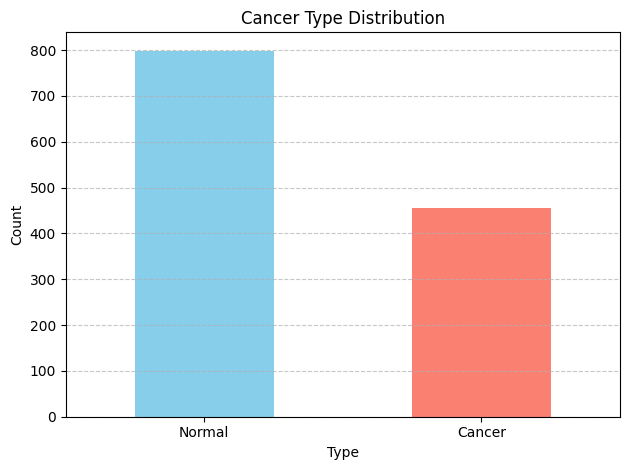

In [43]:
#2. checking class distribution
import matplotlib.pyplot as plt

# Map numerical labels to human-readable categories
label_mapping = {0: 'Normal', 1: 'Cancer'}
label_counts = df_cleaned['Label'].map(label_mapping).value_counts()

# Plot
label_counts.plot(kind='bar', title='Cancer Type Distribution', color=['skyblue', 'salmon'])
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [44]:
!pip install seaborn


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip


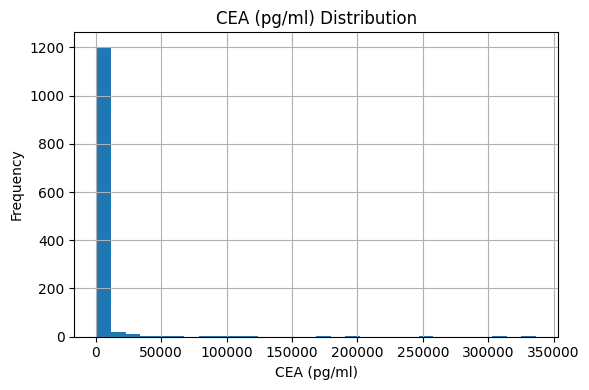

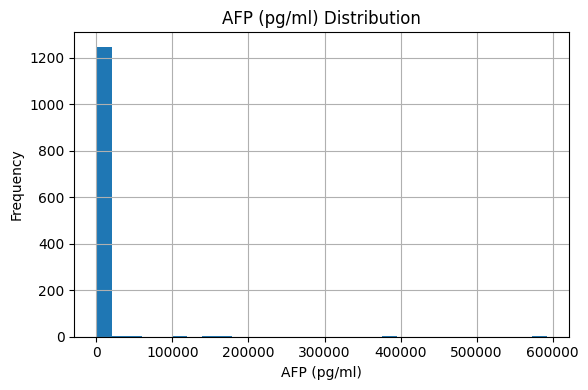

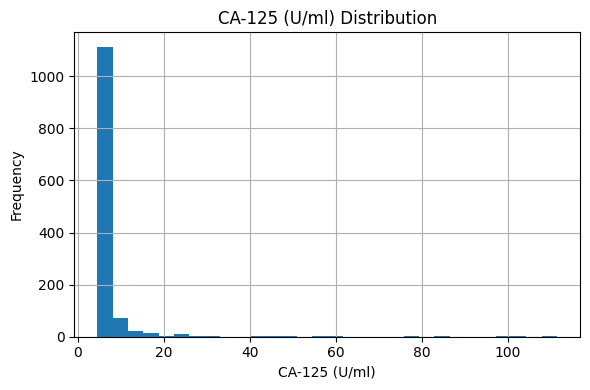

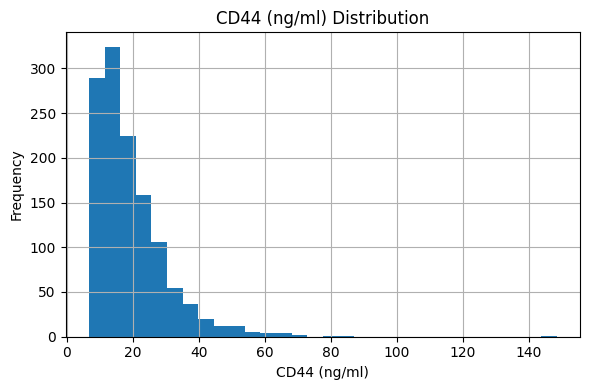

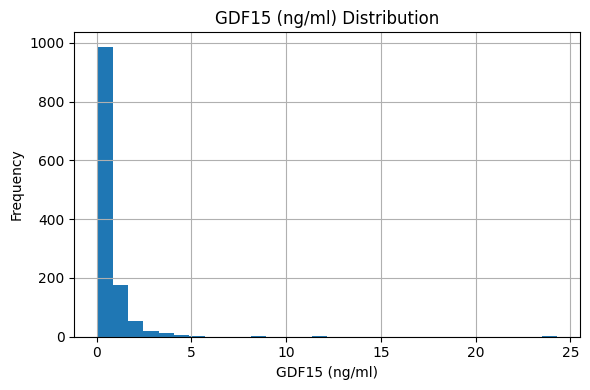

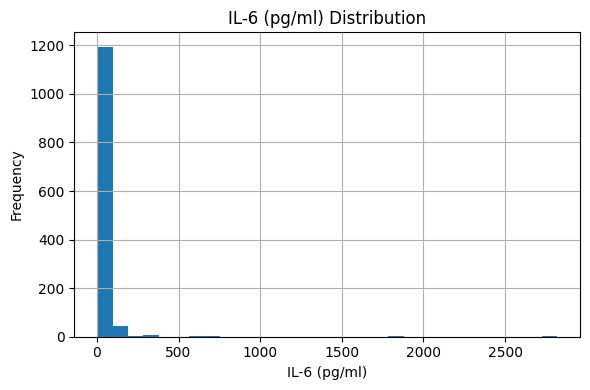

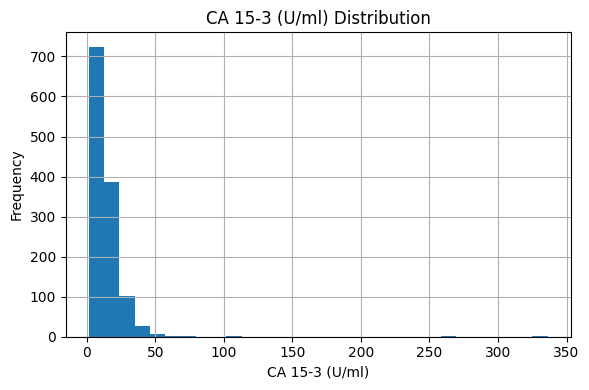

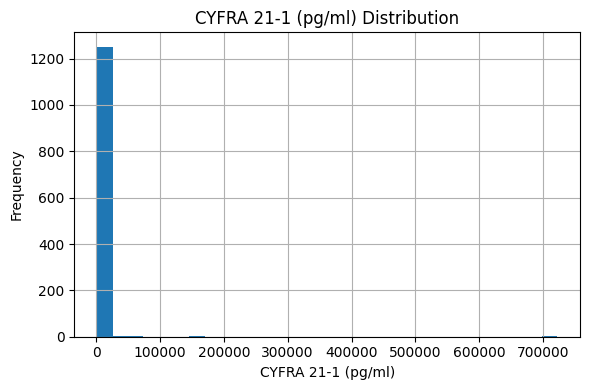

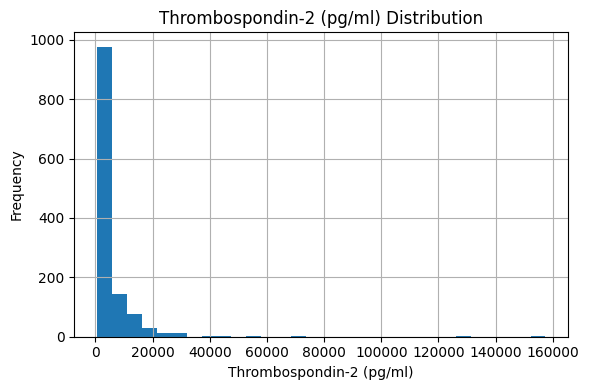

In [45]:
# 3. Histogram for key biomarkers to visualize the distribution
import seaborn as sns
import matplotlib.pyplot as plt

# List of key biomarkers
biomarkers_key = [
    'CEA (pg/ml)', 'AFP (pg/ml)', 'CA-125 (U/ml)', 'CD44 (ng/ml)', 'GDF15 (ng/ml)', 
    'IL-6 (pg/ml)', 'CA 15-3 (U/ml)', 'CYFRA 21-1 (pg/ml)', 'Thrombospondin-2 (pg/ml)'
]

# Histograms for selected biomarkers
for biomarker in biomarkers_key:
    plt.figure(figsize=(6, 4))
    df_cleaned[biomarker].hist(bins=30)
    plt.title(f'{biomarker} Distribution')
    plt.xlabel(f'{biomarker}')
    plt.ylabel('Frequency')
    plt.tight_layout()
    filename = f"{biomarker.replace('/', '').replace(' ', '')}_histogram.png"
    plt.savefig(filename, dpi=300)
    plt.show()

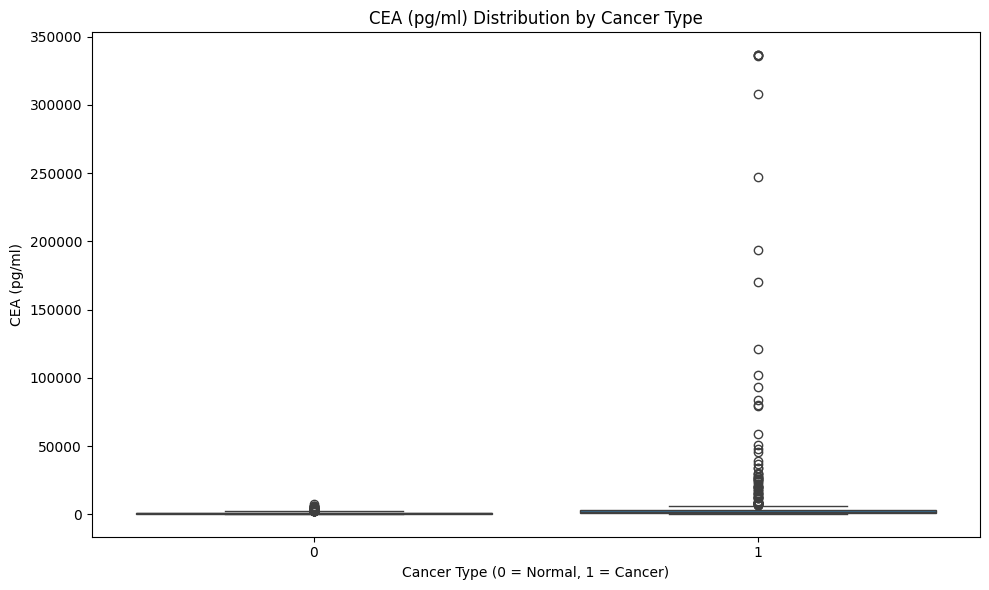

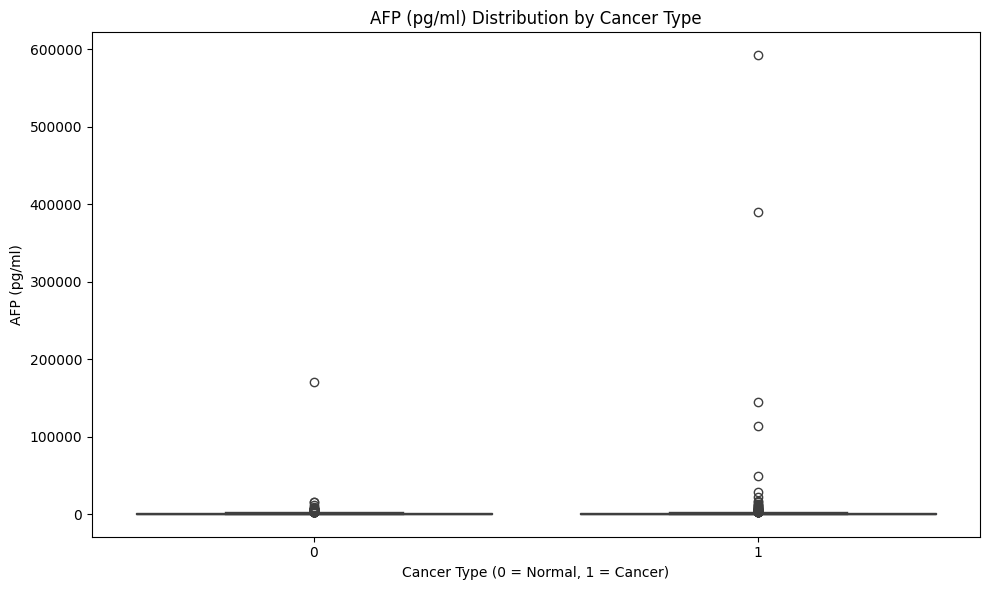

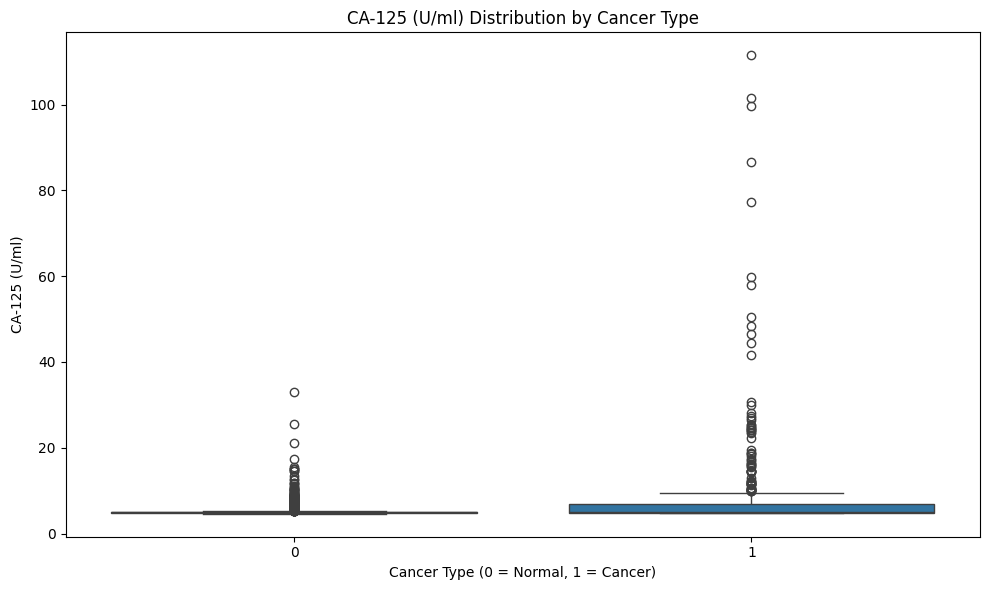

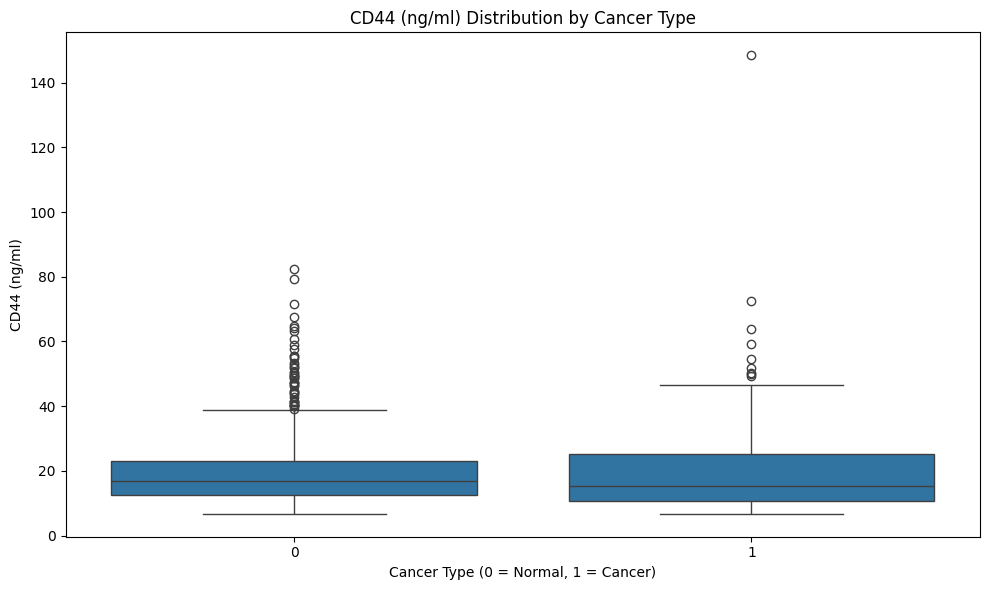

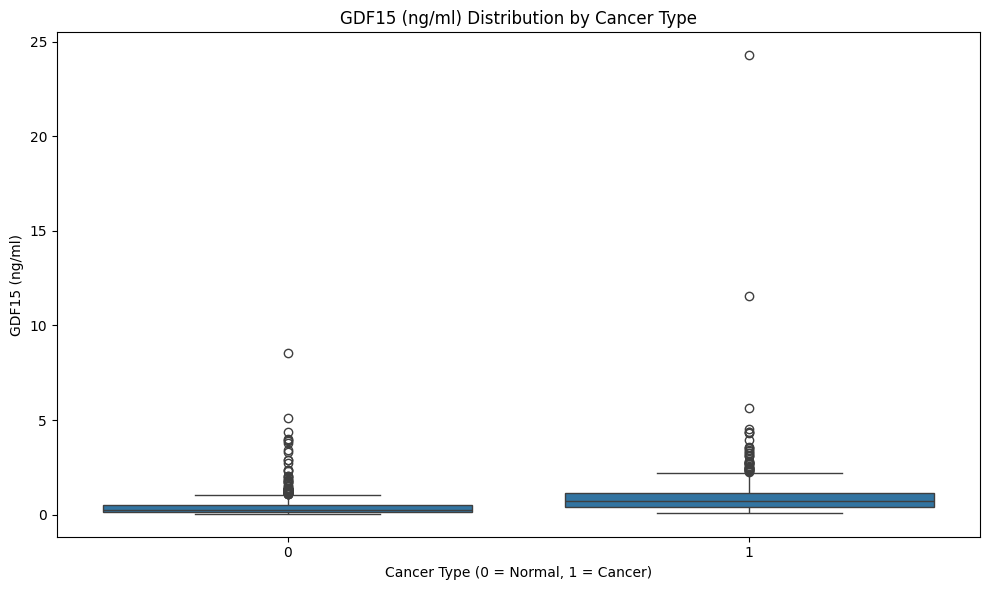

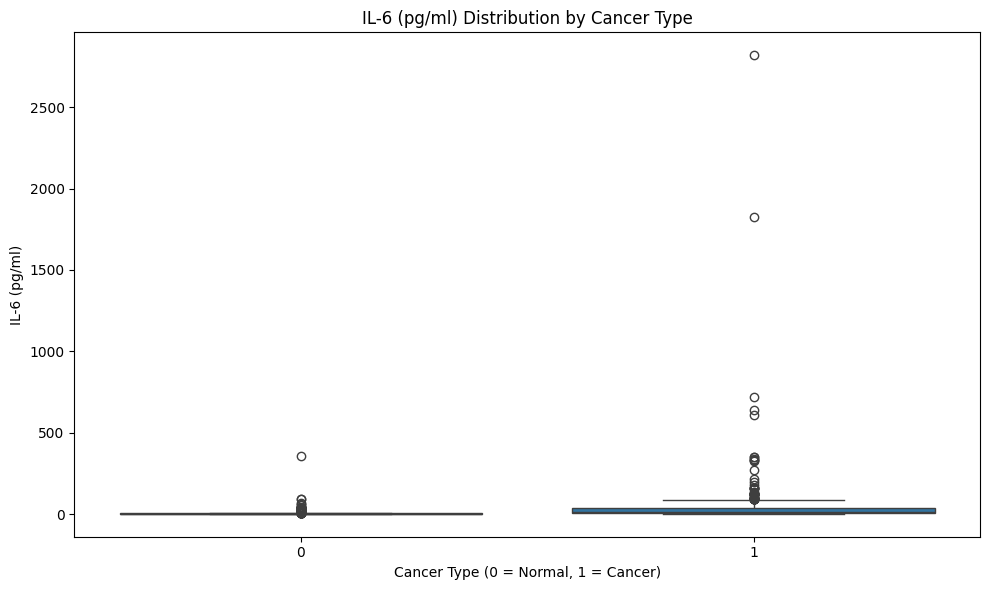

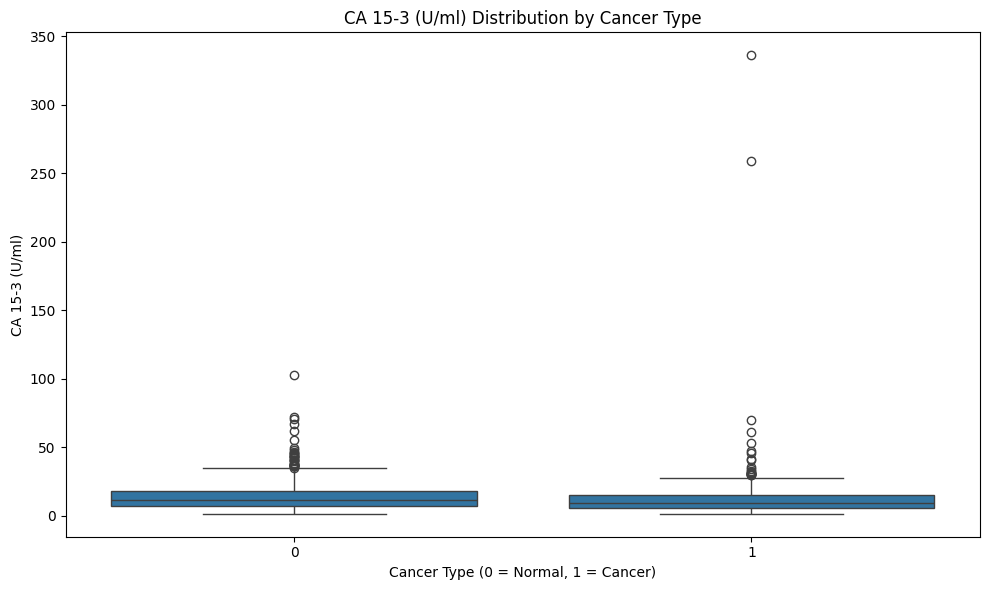

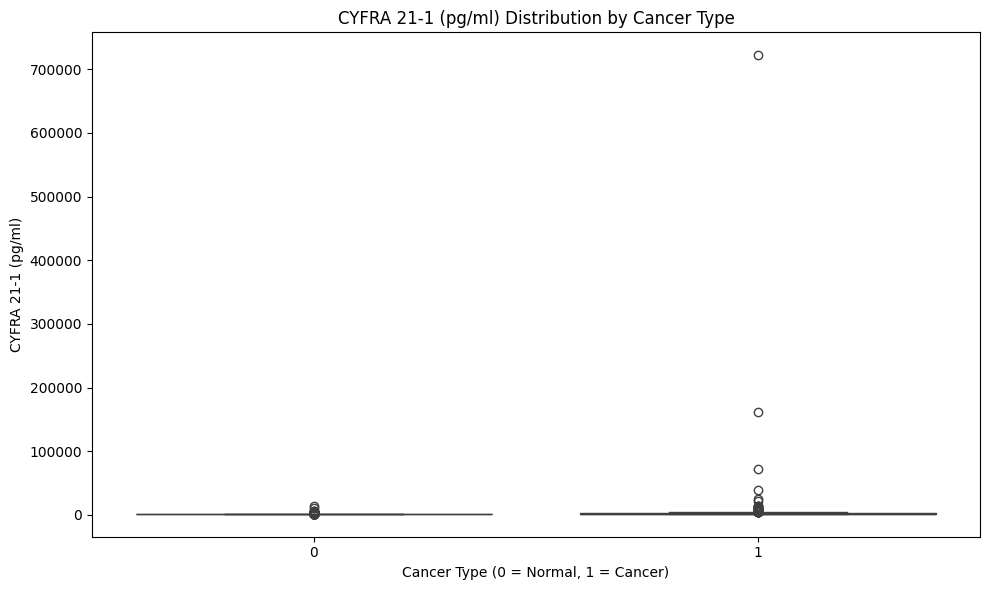

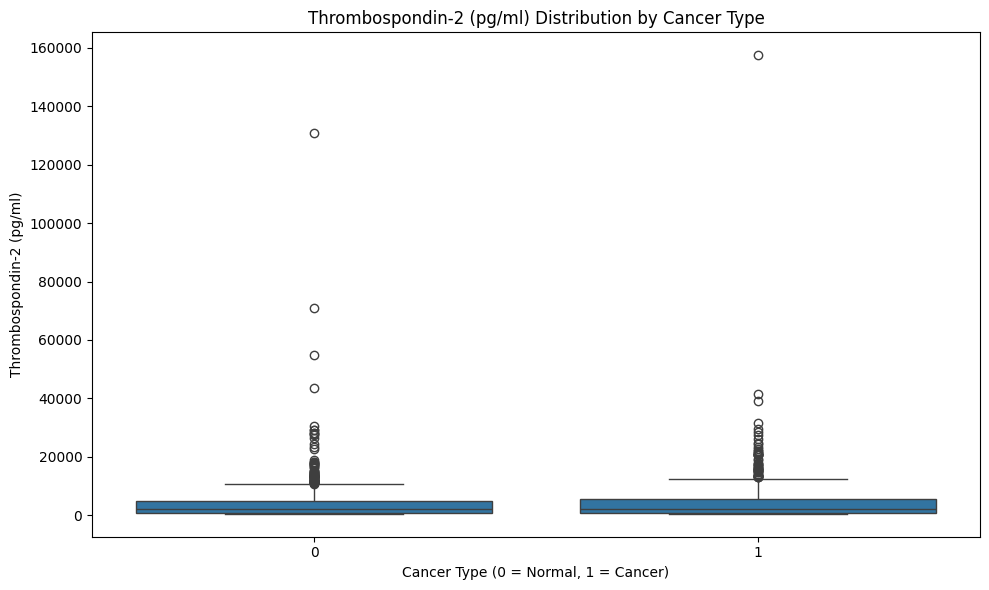

In [46]:
#4 Boxplots of biomarkers by cancer status(0 = Normal, 1 = Cancer)
import seaborn as sns
import matplotlib.pyplot as plt

# List of key biomarkers
biomarkers_key = [
    'CEA (pg/ml)', 'AFP (pg/ml)', 'CA-125 (U/ml)', 'CD44 (ng/ml)', 'GDF15 (ng/ml)', 
    'IL-6 (pg/ml)', 'CA 15-3 (U/ml)', 'CYFRA 21-1 (pg/ml)', 'Thrombospondin-2 (pg/ml)'
]
for biomarker in biomarkers_key:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_cleaned, x='Label', y=biomarker)
    plt.title(f'{biomarker} Distribution by Cancer Type')
    plt.xlabel('Cancer Type (0 = Normal, 1 = Cancer)')
    plt.ylabel(f'{biomarker}')
    plt.tight_layout()
    filename = f"{biomarker.replace('/', '').replace(' ', '')}_boxplot.png"
    plt.savefig(filename, dpi=300)
    plt.show()
    

In [47]:
# 5. Statistical comparison between Normal and Cancer
from scipy.stats import ttest_ind
biomarkers = ['CEA (pg/ml)', 'AFP (pg/ml)', 'CA-125 (U/ml)', 'CD44 (ng/ml)', 'GDF15 (ng/ml)', 
    'IL-6 (pg/ml)', 'CA 15-3 (U/ml)', 'CYFRA 21-1 (pg/ml)', 'Thrombospondin-2 (pg/ml)'
]


stats_summary = []

for col in biomarkers:
    group0 = df_cleaned[df_cleaned['Label'] == 0][col].dropna()
    group1 = df_cleaned[df_cleaned['Label'] == 1][col].dropna()

    stat, p_value = ttest_ind(group0, group1, equal_var=False)
    stats_summary.append({
        'Biomarker': col,
        'Mean (Normal)': round(group0.mean(), 2),
        'Mean (Cancer)': round(group1.mean(), 2),
        'p-value': round(p_value, 5)
    })

# Display the summary table
import pandas as pd
stats_df = pd.DataFrame(stats_summary)
print(stats_df)

                  Biomarker  Mean (Normal)  Mean (Cancer)  p-value
0               CEA (pg/ml)        1094.01       10010.17  0.00000
1               AFP (pg/ml)        1676.21        4616.65  0.07017
2             CA-125 (U/ml)           5.52           8.58  0.00000
3              CD44 (ng/ml)          19.46          19.08  0.57499
4             GDF15 (ng/ml)           0.44           1.02  0.00000
5              IL-6 (pg/ml)           8.05          47.93  0.00000
6            CA 15-3 (U/ml)          13.98          13.07  0.38371
7        CYFRA 21-1 (pg/ml)        2069.59        5120.42  0.06132
8  Thrombospondin-2 (pg/ml)        4179.51        5143.08  0.06015


In [48]:
# 6. Detect outliers and summarize for key biomarkers
import numpy as np
import pandas as pd

#key biomarkers
key_biomarkers = [
    'CEA (pg/ml)', 'AFP (pg/ml)', 'CA-125 (U/ml)', 'CD44 (ng/ml)',
    'GDF15 (ng/ml)', 'IL-6 (pg/ml)', 'CA 15-3 (U/ml)',
    'CYFRA 21-1 (pg/ml)', 'Thrombospondin-2 (pg/ml)'
]

outlier_summary = []

for col in key_biomarkers:
    for label in [0, 1]:
        group = df_cleaned[df_cleaned['Label'] == label][col].dropna()
        Q1 = np.percentile(group, 25)
        Q3 = np.percentile(group, 75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers = group[(group < lower) | (group > upper)]

        outlier_summary.append({
            'Biomarker': col,
            'Label': 'Normal' if label == 0 else 'GI Cancer',
            'Num Outliers': len(outliers),
            'Outlier Min': round(outliers.min(), 2) if not outliers.empty else None,
            'Outlier Max': round(outliers.max(), 2) if not outliers.empty else None
        })
# Create a DataFrame from the outlier counts
outlier_df = pd.DataFrame(outlier_summary)

# Print the outlier summary
print(outlier_df)

# Save the outlier summary to a CSV file
outlier_df.to_csv("outlier_summary.csv", index=False)

                   Biomarker      Label  Num Outliers  Outlier Min  \
0                CEA (pg/ml)     Normal            41      2530.19   
1                CEA (pg/ml)  GI Cancer            69      6637.50   
2                AFP (pg/ml)     Normal            89      2740.52   
3                AFP (pg/ml)  GI Cancer            66      3066.13   
4              CA-125 (U/ml)     Normal           167         5.24   
5              CA-125 (U/ml)  GI Cancer            70         9.88   
6               CD44 (ng/ml)     Normal            43        39.01   
7               CD44 (ng/ml)  GI Cancer             9        49.31   
8              GDF15 (ng/ml)     Normal            56         1.08   
9              GDF15 (ng/ml)  GI Cancer            39         2.27   
10              IL-6 (pg/ml)     Normal           157         6.90   
11              IL-6 (pg/ml)  GI Cancer            61        92.08   
12            CA 15-3 (U/ml)     Normal            33        35.04   
13            CA 15-

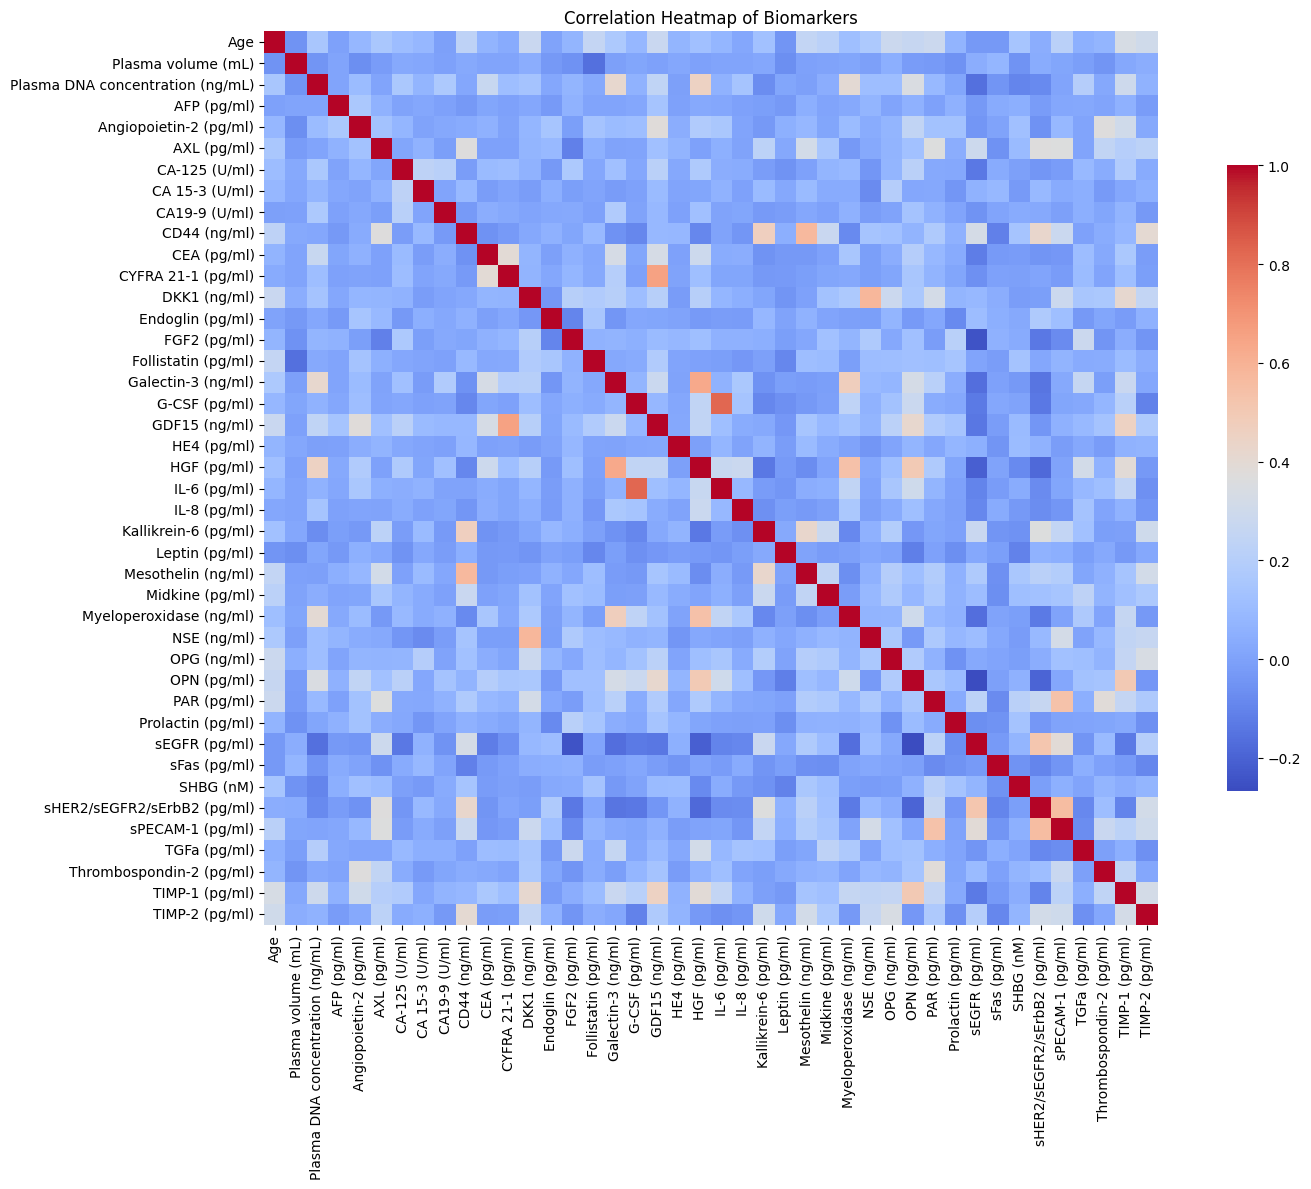

<Figure size 640x480 with 0 Axes>

In [49]:
#7.correlation heatmap of biomarkers
import matplotlib.pyplot as plt
import seaborn as sns

numeric_features = df_cleaned.select_dtypes(include=['float64', 'int64']).drop(columns=['Label'])

corr_matrix = numeric_features.corr()

#heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt=".2f", square=True, cbar_kws={"shrink": 0.7})
plt.title("Correlation Heatmap of Biomarkers")
plt.tight_layout()
plt.show()
plt.savefig("correlation_heatmap.png", dpi=300)

In [50]:
#  grouped key feature averages with demographic insights
#A  Correlation of Age with Biomarkers
age_corr = df_cleaned[["Age"] + key_biomarkers].corr().round(2)['Age'].drop('Age')
print("Correlation of Age with biomarkers:")
print(age_corr)


Correlation of Age with biomarkers:
CEA (pg/ml)                 0.07
AFP (pg/ml)                 0.00
CA-125 (U/ml)               0.11
CD44 (ng/ml)                0.23
GDF15 (ng/ml)               0.28
IL-6 (pg/ml)                0.08
CA 15-3 (U/ml)              0.08
CYFRA 21-1 (pg/ml)          0.03
Thrombospondin-2 (pg/ml)    0.07
Name: Age, dtype: float64


In [51]:

gender_group_insights = df_cleaned.groupby('Sex')[[
    'CEA (pg/ml)', 'AFP (pg/ml)', 'CA-125 (U/ml)', 'CD44 (ng/ml)', 
    'GDF15 (ng/ml)', 'IL-6 (pg/ml)', 'CA 15-3 (U/ml)', 
    'CYFRA 21-1 (pg/ml)', 'Thrombospondin-2 (pg/ml)'
]].mean()

print("\nMean Biomarker Levels by Gender")
print(gender_group_insights)


Mean Biomarker Levels by Gender
        CEA (pg/ml)  AFP (pg/ml)  CA-125 (U/ml)  CD44 (ng/ml)  GDF15 (ng/ml)  \
Sex                                                                            
Female  3637.221521  2294.333857       6.969367     19.179329       0.663506   
Male    4893.027178  3106.250425       6.354652     19.435208       0.642040   

        IL-6 (pg/ml)  CA 15-3 (U/ml)  CYFRA 21-1 (pg/ml)  \
Sex                                                        
Female     15.570791       12.082182         3896.342057   
Male       28.134514       14.904115         2601.232069   

        Thrombospondin-2 (pg/ml)  
Sex                               
Female               4684.914633  
Male                 4404.897593  


In [52]:
ethnicity_group_insights = df_cleaned.groupby('Race')[[
    'CEA (pg/ml)', 'AFP (pg/ml)', 'CA-125 (U/ml)', 'CD44 (ng/ml)', 
    'GDF15 (ng/ml)', 'IL-6 (pg/ml)', 'CA 15-3 (U/ml)', 
    'CYFRA 21-1 (pg/ml)', 'Thrombospondin-2 (pg/ml)'
]].mean()

print("\nMean Biomarker Levels by Ethnicity")
print(ethnicity_group_insights)



Mean Biomarker Levels by Ethnicity
                     CEA (pg/ml)  AFP (pg/ml)  CA-125 (U/ml)  CD44 (ng/ml)  \
Race                                                                         
Asian               16812.844481  5958.071422       8.985754     17.135134   
Black                1232.250636  1522.117727       5.257558     15.153442   
Black/Hispanic       1062.455714  1250.154714       5.199000     14.845000   
Caucasian            2939.400374  2561.940260       6.901047     21.495415   
Caucasian/Hispanic   1013.288400  1180.232600       5.438200     14.415000   
Hispanic             1186.766533  1000.156827       5.482080     18.082933   
Other                 504.110000  1928.400000       4.980000     25.240000   
Unknown               907.650101  2181.423855       5.209508     19.378939   

                    GDF15 (ng/ml)  IL-6 (pg/ml)  CA 15-3 (U/ml)  \
Race                                                              
Asian                    1.201016     72.639690  

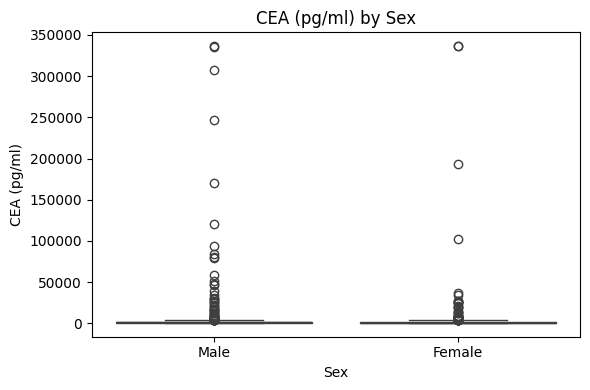

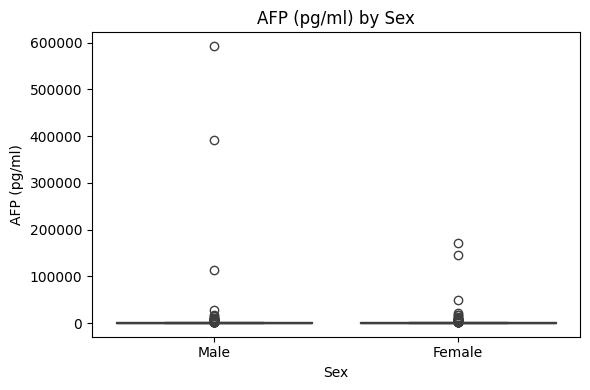

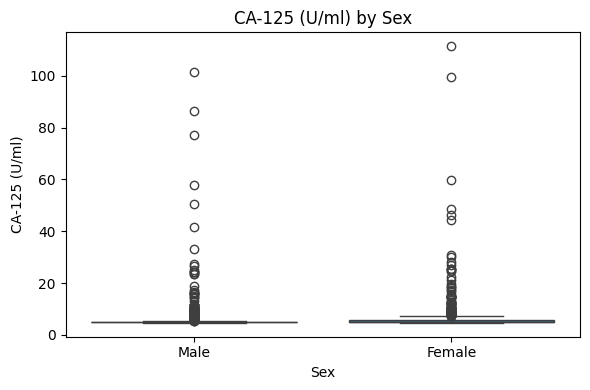

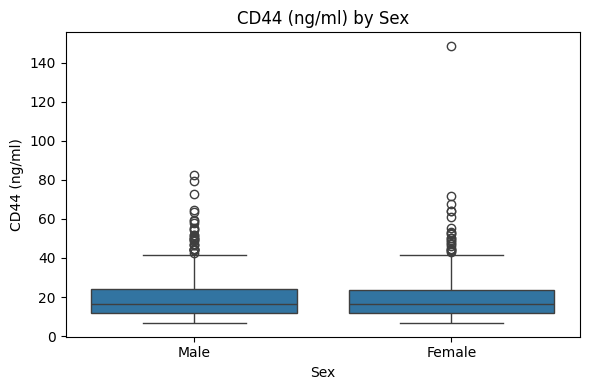

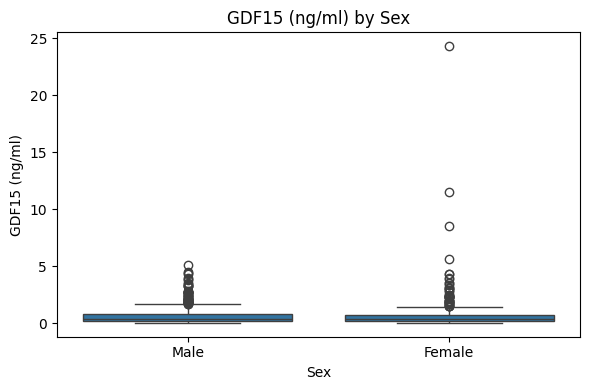

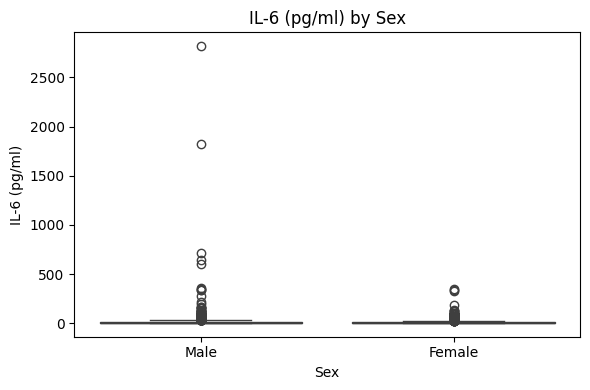

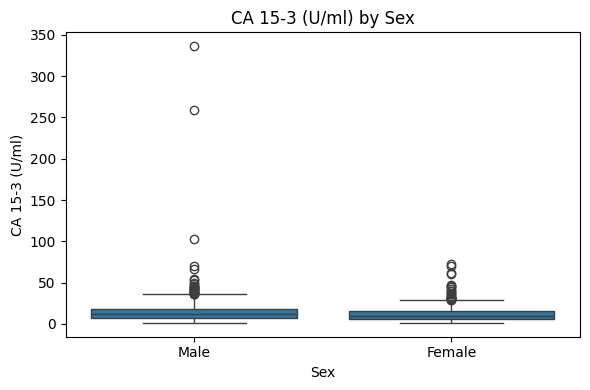

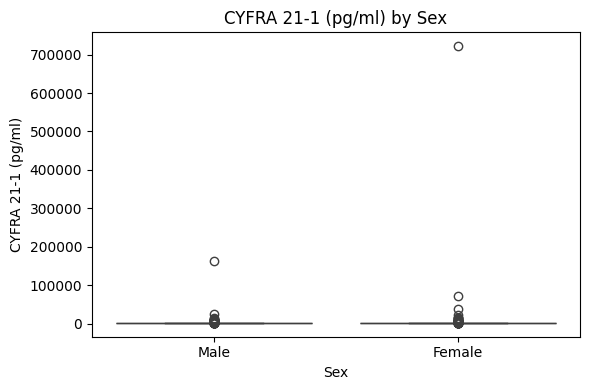

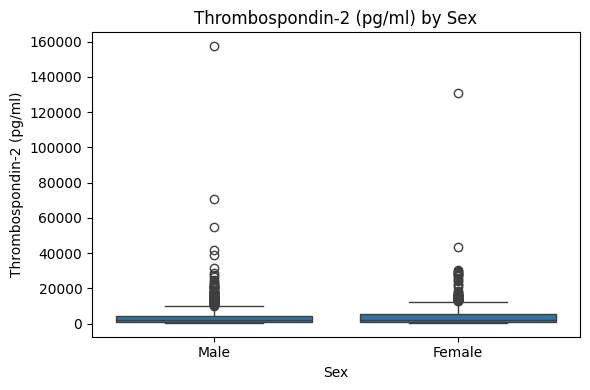

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

key_biomarkers = [
    'CEA (pg/ml)', 'AFP (pg/ml)', 'CA-125 (U/ml)', 'CD44 (ng/ml)',
    'GDF15 (ng/ml)', 'IL-6 (pg/ml)', 'CA 15-3 (U/ml)',
    'CYFRA 21-1 (pg/ml)', 'Thrombospondin-2 (pg/ml)'
]

# Boxplots by Sex
for col in key_biomarkers:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x="Sex", y=col, data=df_cleaned)
    plt.title(f"{col} by Sex")
    plt.xlabel("Sex")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

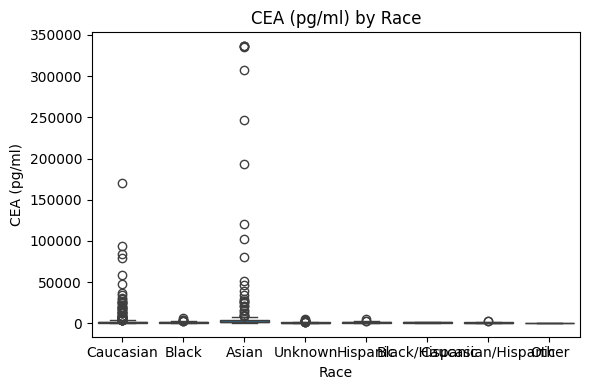

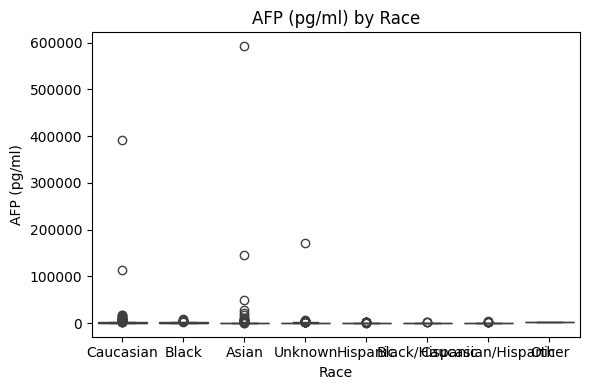

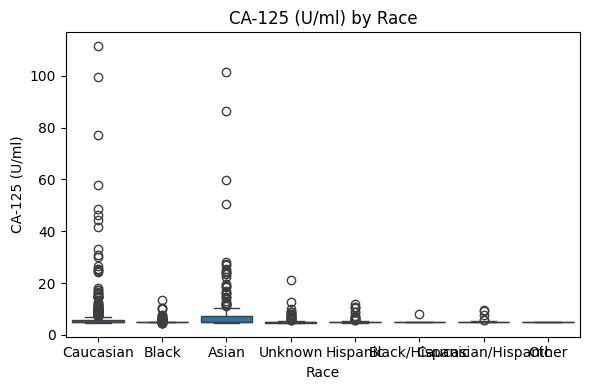

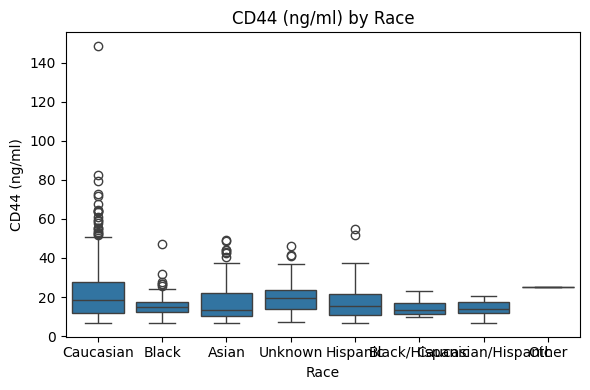

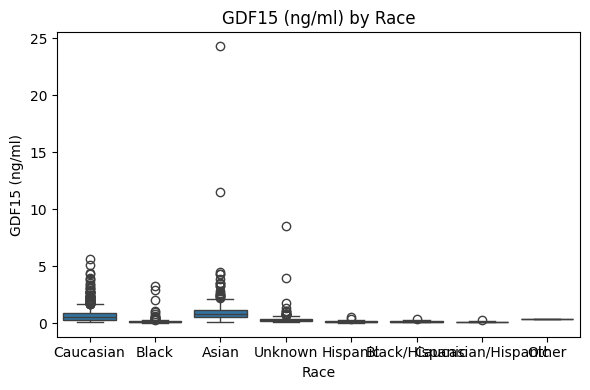

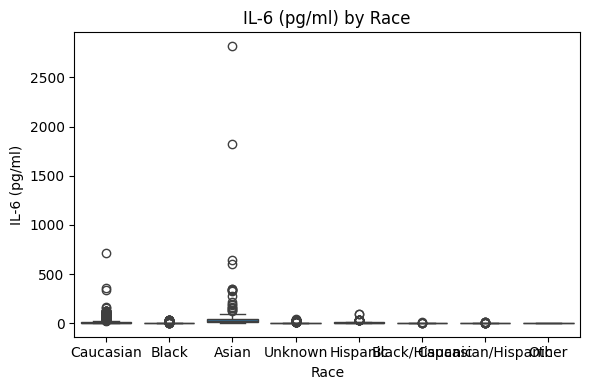

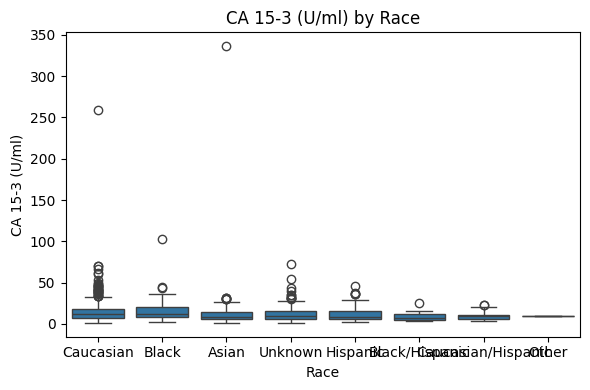

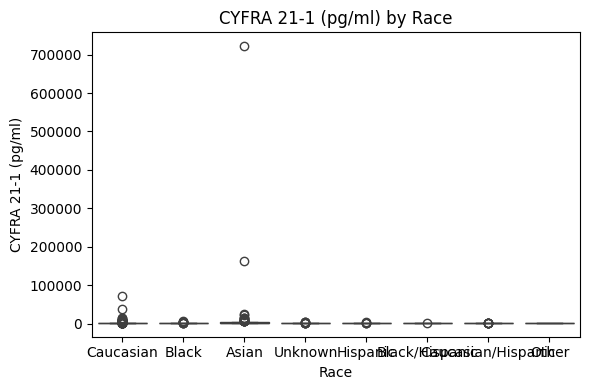

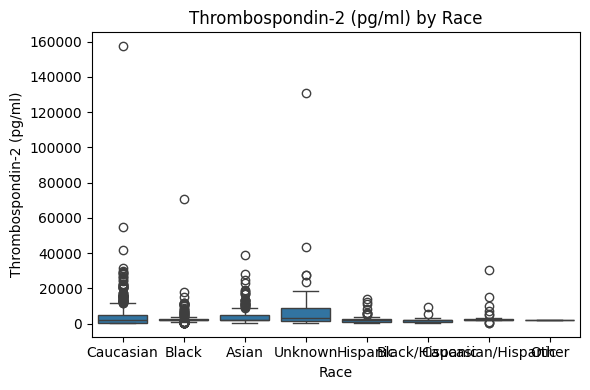

In [54]:
for col in key_biomarkers:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x="Race", y=col, data=df_cleaned)
    plt.title(f"{col} by Race")
    plt.xlabel("Race")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

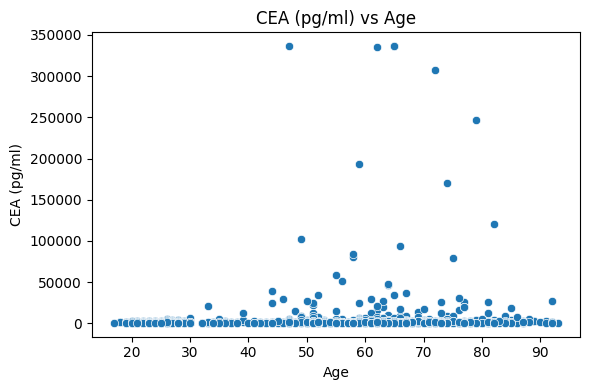

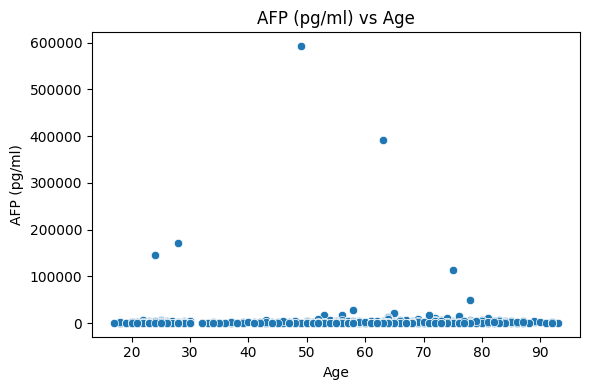

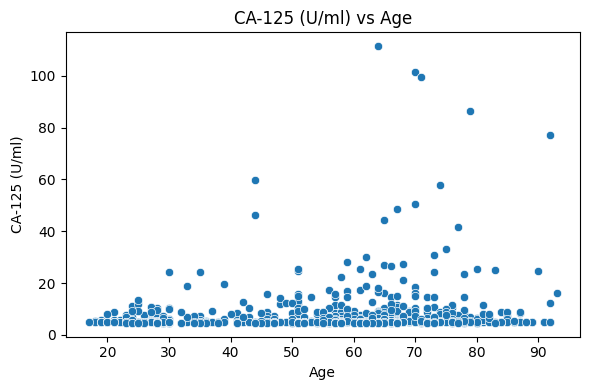

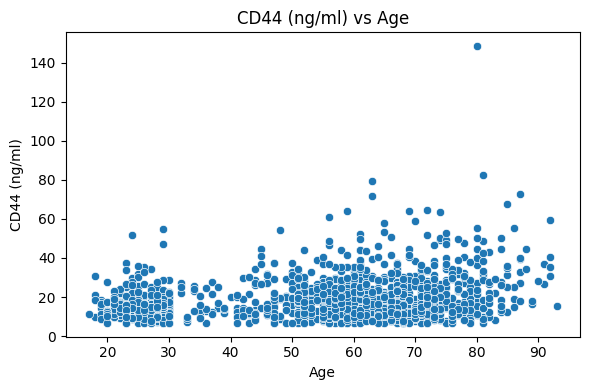

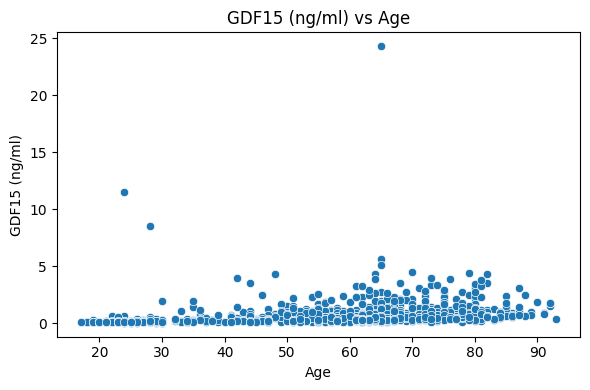

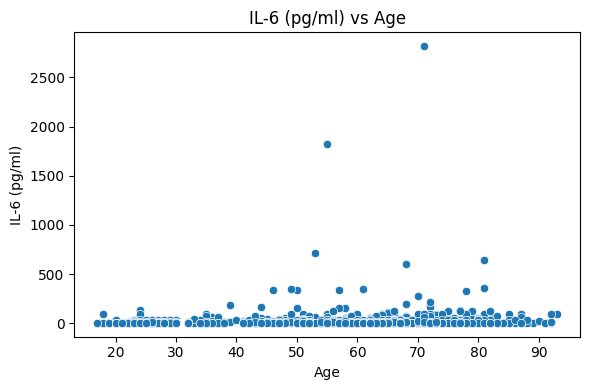

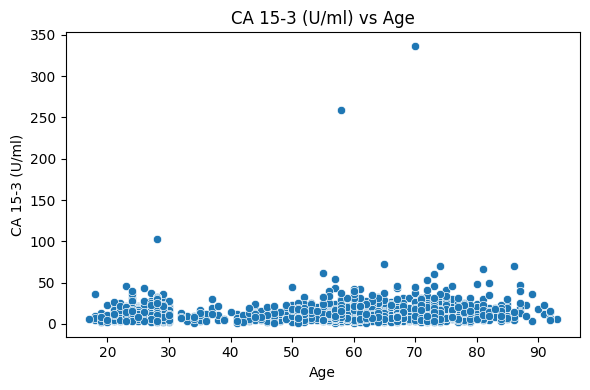

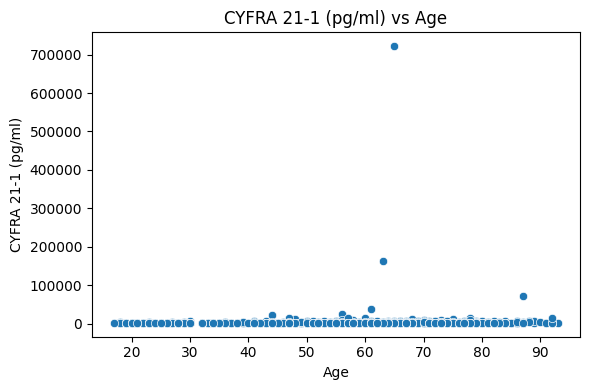

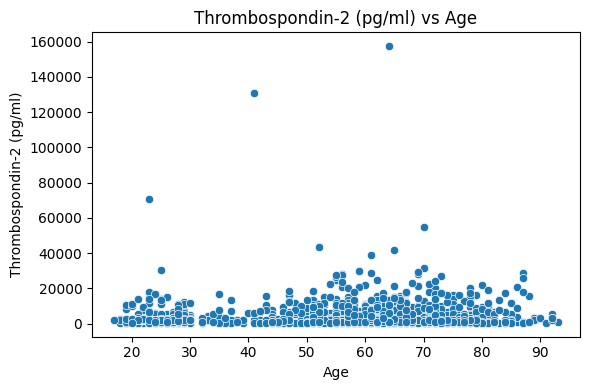

In [55]:
for col in key_biomarkers:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x="Age", y=col, data=df_cleaned)
    plt.title(f"{col} vs Age")
    plt.xlabel("Age")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

In [56]:
from scipy.stats import shapiro
import pandas as pd

normality_results = []

for col in key_biomarkers:
    stat, p_value = shapiro(df_cleaned[col].dropna())
    normality_results.append({
        'Biomarker': col,
        'Shapiro-Wilk p-value': round(p_value, 5),
        'Normality': 'Not Normal' if p_value < 0.05 else 'Normal'
    })

normality_df = pd.DataFrame(normality_results)
print(normality_df)
normality_df.to_csv("Normality_test_results.csv", index=False)

                  Biomarker  Shapiro-Wilk p-value   Normality
0               CEA (pg/ml)                   0.0  Not Normal
1               AFP (pg/ml)                   0.0  Not Normal
2             CA-125 (U/ml)                   0.0  Not Normal
3              CD44 (ng/ml)                   0.0  Not Normal
4             GDF15 (ng/ml)                   0.0  Not Normal
5              IL-6 (pg/ml)                   0.0  Not Normal
6            CA 15-3 (U/ml)                   0.0  Not Normal
7        CYFRA 21-1 (pg/ml)                   0.0  Not Normal
8  Thrombospondin-2 (pg/ml)                   0.0  Not Normal


In [57]:

from scipy import stats

# Define your key biomarkers
biomarkers = [
    'CEA (pg/ml)', 'AFP (pg/ml)', 'CA-125 (U/ml)', 'CD44 (ng/ml)', 
    'GDF15 (ng/ml)', 'IL-6 (pg/ml)', 'CA 15-3 (U/ml)', 
    'CYFRA 21-1 (pg/ml)', 'Thrombospondin-2 (pg/ml)'
]

# Split into cancer and normal groups
cancer_group = df_cleaned[df_cleaned['Label'] == 1]
normal_group = df_cleaned[df_cleaned['Label'] == 0]

# Perform Shapiro-Wilk test
for biomarker in biomarkers:
    shapiro_cancer = stats.shapiro(cancer_group[biomarker].dropna())
    shapiro_normal = stats.shapiro(normal_group[biomarker].dropna())

    print(f"\nShapiro-Wilk Test for '{biomarker}':")
    print(f"  Cancer Group:  p-value = {shapiro_cancer.pvalue:.5f}")
    print(f"  Normal Group:  p-value = {shapiro_normal.pvalue:.5f}")



Shapiro-Wilk Test for 'CEA (pg/ml)':
  Cancer Group:  p-value = 0.00000
  Normal Group:  p-value = 0.00000

Shapiro-Wilk Test for 'AFP (pg/ml)':
  Cancer Group:  p-value = 0.00000
  Normal Group:  p-value = 0.00000

Shapiro-Wilk Test for 'CA-125 (U/ml)':
  Cancer Group:  p-value = 0.00000
  Normal Group:  p-value = 0.00000

Shapiro-Wilk Test for 'CD44 (ng/ml)':
  Cancer Group:  p-value = 0.00000
  Normal Group:  p-value = 0.00000

Shapiro-Wilk Test for 'GDF15 (ng/ml)':
  Cancer Group:  p-value = 0.00000
  Normal Group:  p-value = 0.00000

Shapiro-Wilk Test for 'IL-6 (pg/ml)':
  Cancer Group:  p-value = 0.00000
  Normal Group:  p-value = 0.00000

Shapiro-Wilk Test for 'CA 15-3 (U/ml)':
  Cancer Group:  p-value = 0.00000
  Normal Group:  p-value = 0.00000

Shapiro-Wilk Test for 'CYFRA 21-1 (pg/ml)':
  Cancer Group:  p-value = 0.00000
  Normal Group:  p-value = 0.00000

Shapiro-Wilk Test for 'Thrombospondin-2 (pg/ml)':
  Cancer Group:  p-value = 0.00000
  Normal Group:  p-value = 0.00000

In [58]:
import pandas as pd

# 1. Load your dataset
df_cleaned = pd.read_csv("Dropped_rows_dataset.csv")

# 2. Define clinical thresholds (use pg/ml for consistency)
clinical_thresholds = {
    'AFP (pg/ml)': 20000,
    'Angiopoietin-2 (pg/ml)': 4141,
    'AXL (pg/ml)': 1243,
    'CA-125 (U/ml)': 35,
    'CA 15-3 (U/ml)': 30,
    'CA19-9 (U/ml)': 37,
    'CYFRA 21-1 (pg/ml)': 3500,
    'CEA (pg/ml)': 5000,
    'DKK1 (ng/ml)': 2.03 * 1000,  # ng/ml to pg/ml
    'Endoglin (pg/ml)': 2000,
    'FGF2 (pg/ml)': 10,
    'Follistatin (pg/ml)': 4700,
    'Galectin-3 (ng/ml)': 22.1 * 1000,
    'G-CSF (pg/ml)': 15,
    'GDF15 (ng/ml)': 1200 * 1000,
    'HE4 (pg/ml)': 3500,
    'HGF (pg/ml)': 1000,
    'IL-6 (pg/ml)': 5,
    'IL-8 (pg/ml)': 57.7,
    'Kallikrein-6 (pg/ml)': 1000,
    'Mesothelin (ng/ml)': 2 * 1000,
    'Midkine (pg/ml)': 400,
    'Myeloperoxidase (ng/ml)': 220 * 1000,
    'NSE (ng/ml)': 16.3 * 1000,
    'OPG (ng/ml)': 0.2 * 1000,
    'OPN (pg/ml)': 200000,
    'sFas (pg/ml)': 150,
    'sHER2/sEGFR2/sErbB2 (pg/ml)': 15000,
    'TGFa (pg/ml)': 100,
    'Thrombospondin-2 (pg/ml)': 45000,
    'TIMP-1 (pg/ml)': 126000,
}

# 3. Sex-specific thresholds
sex_specific_thresholds = {
    'Leptin (pg/ml)': {'Male': 15200, 'Female': 12500},
    'Prolactin (pg/ml)': {'Male': 18000, 'Female': 25000},
    'SHBG (nM)': {'Male': 54, 'Female': 145},
}

# 4. Convert biomarker columns to numeric
for col in df_cleaned.columns:
    df[col] = pd.to_numeric(df_cleaned[col], errors='coerce')

# 5. Apply clinical threshold flags
for biomarker, threshold in clinical_thresholds.items():
    if biomarker in df_cleaned.columns:
        df_cleaned[f"{biomarker}_flag"] = (df_cleaned[biomarker] > threshold).astype(int)

# 6. Handle sex-specific thresholds
for biomarker, thresholds in sex_specific_thresholds.items():
    if biomarker in df_cleaned.columns and 'Sex' in df_cleaned.columns:
        df_cleaned[f"{biomarker}_flag"] = df_cleaned.apply(
            lambda row: int(row[biomarker] > thresholds.get(row['Sex'], float('inf'))), axis=1
        )

# 7. Remove any mistakenly flagged non-biomarker
non_biomarker_flags = ['Sex_flag', 'Sample_ID_flag']
df_cleaned.drop(columns=[col for col in non_biomarker_flags if col in df_cleaned.columns], inplace=True)

# 8. Save updated dataset
df_cleaned.to_csv("threshold_flagged_dataset_final.csv", index=False)
# print(df_cleaned.columns)
# print(df_cleaned.shape)
df_cleaned.head()

,Sample_ID,Age,Sex,Race,Tumor type_from_df1,Plasma volume (mL),Plasma DNA concentration (ng/mL),AFP (pg/ml),Angiopoietin-2 (pg/ml),AXL (pg/ml),CA-125 (U/ml),CA 15-3 (U/ml),CA19-9 (U/ml),CD44 (ng/ml),CEA (pg/ml),CYFRA 21-1 (pg/ml),DKK1 (ng/ml),Endoglin (pg/ml),FGF2 (pg/ml),Follistatin (pg/ml),Galectin-3 (ng/ml),G-CSF (pg/ml),GDF15 (ng/ml),HE4 (pg/ml),HGF (pg/ml),IL-6 (pg/ml),IL-8 (pg/ml),Kallikrein-6 (pg/ml),Leptin (pg/ml),Mesothelin (ng/ml),Midkine (pg/ml),Myeloperoxidase (ng/ml),NSE (ng/ml),OPG (ng/ml),OPN (pg/ml),PAR (pg/ml),Prolactin (pg/ml),sEGFR (pg/ml),sFas (pg/ml),SHBG (nM),sHER2/sEGFR2/sErbB2 (pg/ml),sPECAM-1 (pg/ml),TGFa (pg/ml),Thrombospondin-2 (pg/ml),TIMP-1 (pg/ml),TIMP-2 (pg/ml),Label,AFP (pg/ml)_flag,Angiopoietin-2 (pg/ml)_flag,AXL (pg/ml)_flag,CA-125 (U/ml)_flag,CA 15-3 (U/ml)_flag,CA19-9 (U/ml)_flag,CYFRA 21-1 (pg/ml)_flag,CEA (pg/ml)_flag,DKK1 (ng/ml)_flag,Endoglin (pg/ml)_flag,FGF2 (pg/ml)_flag,Follistatin (pg/ml)_flag,Galectin-3 (ng/ml)_flag,G-CSF (pg/ml)_flag,GDF15 (ng/ml)_flag,HE4 (pg/ml)_flag,HGF (pg/ml)_flag,IL-6 (pg/ml)_flag,IL-8 (pg/ml)_flag,Kallikrein-6 (pg/ml)_flag,Mesothelin (ng/ml)_flag,Midkine (pg/ml)_flag,Myeloperoxidase (ng/ml)_flag,NSE (ng/ml)_flag,OPG (ng/ml)_flag,OPN (pg/ml)_flag,sFas (pg/ml)_flag,sHER2/sEGFR2/sErbB2 (pg/ml)_flag,TGFa (pg/ml)_flag,Thrombospondin-2 (pg/ml)_flag,TIMP-1 (pg/ml)_flag,Leptin (pg/ml)_flag,Prolactin (pg/ml)_flag,SHBG (nM)_flag
0,CRC 455 PLS 1,60,Male,Caucasian,Colorectum,5.0,6.08,1583.450,5598.50,3621.04,5.090,19.08,16.452,9.81,540.1,1938.654,0.78,2882.65,92.02,2144.33,11.19,131.46,0.53,3857.712,377.26,11.316,8.238,5938.28,75826.61,14.29,315.23,14.22,12.04,0.47,56516.58,8852.96,11606.60,3284.17,204.792,55.06,6832.07,9368.53,16.086,21863.74,56428.71,39498.82,1,0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1
1,CRC 456 PLS 1,59,Female,Caucasian,Colorectum,4.0,46.01,715.308,20936.35,2772.96,7.270,10.04,40.910,27.57,5902.4,1938.654,0.77,3921.77,164.06,1646.26,9.90,131.46,2.39,5779.110,659.68,21.280,29.820,3409.18,211751.33,32.57,260.56,23.88,23.25,0.34,61001.39,20782.58,14374.99,1911.81,204.792,72.92,5549.47,6224.55,16.086,29669.66,73940.49,41277.09,1,0,1,1,0,0,1,0,1,0,1,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,CRC 457 PLS 1,69,Female,Caucasian,Colorectum,4.5,6.94,4365.530,2350.93,4120.77,4.854,16.96,16.452,14.59,973.8,1976.940,0.90,2410.16,154.77,2486.88,11.61,131.46,0.50,3857.712,329.07,11.316,35.060,3338.60,2683.07,15.09,491.81,12.02,12.84,0.37,88896.24,7534.43,38375.00,1743.94,204.792,173.78,3698.16,4046.48,179.030,6020.47,22797.28,28440.60,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,1
3,CRC 458 PLS 1,70,Female,Caucasian,Colorectum,7.5,7.15,715.308,1604.34,2029.96,5.390,8.31,16.452,7.78,2027.5,1938.654,0.64,1284.96,227.57,829.43,4.80,152.24,0.19,7819.170,266.66,15.300,15.890,3162.89,41859.78,16.52,230.45,6.49,22.79,0.29,42549.61,4722.42,12072.51,1059.24,204.792,29.47,5856.00,6121.93,16.086,4331.02,20441.19,25896.73,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,CRC 459 PLS 1,43,Female,Caucasian,Colorectum,5.0,9.81,801.300,2087.57,2069.17,4.854,11.73,16.452,12.21,614.5,1938.654,0.78,2552.72,134.72,2168.23,8.92,131.46,0.30,3857.712,370.88,11.316,8.238,4442.46,100119.47,8.81,238.47,13.33,27.20,0.29,24274.11,6945.90,23718.17,1736.92,204.792,78.07,5447.93,6982.32,16.086,2311.91,56288.51,49425.20,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [59]:
import pandas as pd

# 1. Load your dataset
df_cleaned = pd.read_csv("Dropped_rows_dataset.csv")

# 2. Define clinical thresholds (use pg/ml for consistency)
clinical_thresholds = {
    'AFP (pg/ml)': 20000,
    'Angiopoietin-2 (pg/ml)': 4141,
    'AXL (pg/ml)': 1243,
    'CA-125 (U/ml)': 35,
    'CA 15-3 (U/ml)': 30,
    'CA19-9 (U/ml)': 37,
    'CYFRA 21-1 (pg/ml)': 3500,
    'CEA (pg/ml)': 5000,
    'DKK1 (ng/ml)': 2.03 * 1000,  # ng/ml to pg/ml
    'Endoglin (pg/ml)': 2000,
    'FGF2 (pg/ml)': 10,
    'Follistatin (pg/ml)': 4700,
    'Galectin-3 (ng/ml)': 22.1 * 1000,
    'G-CSF (pg/ml)': 15,
    'GDF15 (ng/ml)': 1200 * 1000,
    'HE4 (pg/ml)': 3500,
    'HGF (pg/ml)': 1000,
    'IL-6 (pg/ml)': 5,
    'IL-8 (pg/ml)': 57.7,
    'Kallikrein-6 (pg/ml)': 1000,
    'Mesothelin (ng/ml)': 2 * 1000,
    'Midkine (pg/ml)': 400,
    'Myeloperoxidase (ng/ml)': 220 * 1000,
    'NSE (ng/ml)': 16.3 * 1000,
    'OPG (ng/ml)': 0.2 * 1000,
    'OPN (pg/ml)': 200000,
    'sFas (pg/ml)': 150,
    'sHER2/sEGFR2/sErbB2 (pg/ml)': 15000,
    'TGFa (pg/ml)': 100,
    'Thrombospondin-2 (pg/ml)': 45000,
    'TIMP-1 (pg/ml)': 126000,
}

# 3. Sex-specific thresholds
sex_specific_thresholds = {
    'Leptin (pg/ml)': {'Male': 15200, 'Female': 12500},
    'Prolactin (pg/ml)': {'Male': 18000, 'Female': 25000},
    'SHBG (nM)': {'Male': 54, 'Female': 145},
}

# 4. Convert biomarker columns to numeric
for col in df_cleaned.columns:
    df[col] = pd.to_numeric(df_cleaned[col], errors='coerce')

# 5. Apply clinical threshold flags
for biomarker, threshold in clinical_thresholds.items():
    if biomarker in df_cleaned.columns:
        df_cleaned[f"{biomarker}_flag"] = (df_cleaned[biomarker] > threshold).astype(int)

# 6. Handle sex-specific thresholds
for biomarker, thresholds in sex_specific_thresholds.items():
    if biomarker in df_cleaned.columns and 'Sex' in df_cleaned.columns:
        df_cleaned[f"{biomarker}_flag"] = df_cleaned.apply(
            lambda row: int(row[biomarker] > thresholds.get(row['Sex'], float('inf'))), axis=1
        )

# 7. Remove any mistakenly flagged non-biomarker
non_biomarker_flags = ['Sex_flag', 'Sample_ID_flag']
df_cleaned.drop(columns=[col for col in non_biomarker_flags if col in df_cleaned.columns], inplace=True)

# 8. Save updated dataset
df_cleaned.to_csv("threshold_flagged_dataset_final.csv", index=False)
# print(df_cleaned.columns)
# print(df_cleaned.shape)
df_cleaned.head()

,Sample_ID,Age,Sex,Race,Tumor type_from_df1,Plasma volume (mL),Plasma DNA concentration (ng/mL),AFP (pg/ml),Angiopoietin-2 (pg/ml),AXL (pg/ml),CA-125 (U/ml),CA 15-3 (U/ml),CA19-9 (U/ml),CD44 (ng/ml),CEA (pg/ml),CYFRA 21-1 (pg/ml),DKK1 (ng/ml),Endoglin (pg/ml),FGF2 (pg/ml),Follistatin (pg/ml),Galectin-3 (ng/ml),G-CSF (pg/ml),GDF15 (ng/ml),HE4 (pg/ml),HGF (pg/ml),IL-6 (pg/ml),IL-8 (pg/ml),Kallikrein-6 (pg/ml),Leptin (pg/ml),Mesothelin (ng/ml),Midkine (pg/ml),Myeloperoxidase (ng/ml),NSE (ng/ml),OPG (ng/ml),OPN (pg/ml),PAR (pg/ml),Prolactin (pg/ml),sEGFR (pg/ml),sFas (pg/ml),SHBG (nM),sHER2/sEGFR2/sErbB2 (pg/ml),sPECAM-1 (pg/ml),TGFa (pg/ml),Thrombospondin-2 (pg/ml),TIMP-1 (pg/ml),TIMP-2 (pg/ml),Label,AFP (pg/ml)_flag,Angiopoietin-2 (pg/ml)_flag,AXL (pg/ml)_flag,CA-125 (U/ml)_flag,CA 15-3 (U/ml)_flag,CA19-9 (U/ml)_flag,CYFRA 21-1 (pg/ml)_flag,CEA (pg/ml)_flag,DKK1 (ng/ml)_flag,Endoglin (pg/ml)_flag,FGF2 (pg/ml)_flag,Follistatin (pg/ml)_flag,Galectin-3 (ng/ml)_flag,G-CSF (pg/ml)_flag,GDF15 (ng/ml)_flag,HE4 (pg/ml)_flag,HGF (pg/ml)_flag,IL-6 (pg/ml)_flag,IL-8 (pg/ml)_flag,Kallikrein-6 (pg/ml)_flag,Mesothelin (ng/ml)_flag,Midkine (pg/ml)_flag,Myeloperoxidase (ng/ml)_flag,NSE (ng/ml)_flag,OPG (ng/ml)_flag,OPN (pg/ml)_flag,sFas (pg/ml)_flag,sHER2/sEGFR2/sErbB2 (pg/ml)_flag,TGFa (pg/ml)_flag,Thrombospondin-2 (pg/ml)_flag,TIMP-1 (pg/ml)_flag,Leptin (pg/ml)_flag,Prolactin (pg/ml)_flag,SHBG (nM)_flag
0,CRC 455 PLS 1,60,Male,Caucasian,Colorectum,5.0,6.08,1583.450,5598.50,3621.04,5.090,19.08,16.452,9.81,540.1,1938.654,0.78,2882.65,92.02,2144.33,11.19,131.46,0.53,3857.712,377.26,11.316,8.238,5938.28,75826.61,14.29,315.23,14.22,12.04,0.47,56516.58,8852.96,11606.60,3284.17,204.792,55.06,6832.07,9368.53,16.086,21863.74,56428.71,39498.82,1,0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1
1,CRC 456 PLS 1,59,Female,Caucasian,Colorectum,4.0,46.01,715.308,20936.35,2772.96,7.270,10.04,40.910,27.57,5902.4,1938.654,0.77,3921.77,164.06,1646.26,9.90,131.46,2.39,5779.110,659.68,21.280,29.820,3409.18,211751.33,32.57,260.56,23.88,23.25,0.34,61001.39,20782.58,14374.99,1911.81,204.792,72.92,5549.47,6224.55,16.086,29669.66,73940.49,41277.09,1,0,1,1,0,0,1,0,1,0,1,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,CRC 457 PLS 1,69,Female,Caucasian,Colorectum,4.5,6.94,4365.530,2350.93,4120.77,4.854,16.96,16.452,14.59,973.8,1976.940,0.90,2410.16,154.77,2486.88,11.61,131.46,0.50,3857.712,329.07,11.316,35.060,3338.60,2683.07,15.09,491.81,12.02,12.84,0.37,88896.24,7534.43,38375.00,1743.94,204.792,173.78,3698.16,4046.48,179.030,6020.47,22797.28,28440.60,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,1
3,CRC 458 PLS 1,70,Female,Caucasian,Colorectum,7.5,7.15,715.308,1604.34,2029.96,5.390,8.31,16.452,7.78,2027.5,1938.654,0.64,1284.96,227.57,829.43,4.80,152.24,0.19,7819.170,266.66,15.300,15.890,3162.89,41859.78,16.52,230.45,6.49,22.79,0.29,42549.61,4722.42,12072.51,1059.24,204.792,29.47,5856.00,6121.93,16.086,4331.02,20441.19,25896.73,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,CRC 459 PLS 1,43,Female,Caucasian,Colorectum,5.0,9.81,801.300,2087.57,2069.17,4.854,11.73,16.452,12.21,614.5,1938.654,0.78,2552.72,134.72,2168.23,8.92,131.46,0.30,3857.712,370.88,11.316,8.238,4442.46,100119.47,8.81,238.47,13.33,27.20,0.29,24274.11,6945.90,23718.17,1736.92,204.792,78.07,5447.93,6982.32,16.086,2311.91,56288.51,49425.20,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [60]:
import pandas as pd

# 1. Load your dataset
df_cleaned = pd.read_csv("Dropped_rows_dataset.csv")

# 2. Define clinical thresholds (use pg/ml for consistency)
clinical_thresholds = {
    'AFP (pg/ml)': 20000,
    'Angiopoietin-2 (pg/ml)': 4141,
    'AXL (pg/ml)': 1243,
    'CA-125 (U/ml)': 35,
    'CA 15-3 (U/ml)': 30,
    'CA19-9 (U/ml)': 37,
    'CYFRA 21-1 (pg/ml)': 3500,
    'CEA (pg/ml)': 5000,
    'DKK1 (ng/ml)': 2.03 * 1000,  # ng/ml to pg/ml
    'Endoglin (pg/ml)': 2000,
    'FGF2 (pg/ml)': 10,
    'Follistatin (pg/ml)': 4700,
    'Galectin-3 (ng/ml)': 22.1 * 1000,
    'G-CSF (pg/ml)': 15,
    'GDF15 (ng/ml)': 1200 * 1000,
    'HE4 (pg/ml)': 3500,
    'HGF (pg/ml)': 1000,
    'IL-6 (pg/ml)': 5,
    'IL-8 (pg/ml)': 57.7,
    'Kallikrein-6 (pg/ml)': 1000,
    'Mesothelin (ng/ml)': 2 * 1000,
    'Midkine (pg/ml)': 400,
    'Myeloperoxidase (ng/ml)': 220 * 1000,
    'NSE (ng/ml)': 16.3 * 1000,
    'OPG (ng/ml)': 0.2 * 1000,
    'OPN (pg/ml)': 200000,
    'sFas (pg/ml)': 150,
    'sHER2/sEGFR2/sErbB2 (pg/ml)': 15000,
    'TGFa (pg/ml)': 100,
    'Thrombospondin-2 (pg/ml)': 45000,
    'TIMP-1 (pg/ml)': 126000,
}

# 3. Sex-specific thresholds
sex_specific_thresholds = {
    'Leptin (pg/ml)': {'Male': 15200, 'Female': 12500},
    'Prolactin (pg/ml)': {'Male': 18000, 'Female': 25000},
    'SHBG (nM)': {'Male': 54, 'Female': 145},
}

# 4. Convert biomarker columns to numeric
for col in df_cleaned.columns:
    df[col] = pd.to_numeric(df_cleaned[col], errors='coerce')

# 5. Apply clinical threshold flags
for biomarker, threshold in clinical_thresholds.items():
    if biomarker in df_cleaned.columns:
        df_cleaned[f"{biomarker}_flag"] = (df_cleaned[biomarker] > threshold).astype(int)

# 6. Handle sex-specific thresholds
for biomarker, thresholds in sex_specific_thresholds.items():
    if biomarker in df_cleaned.columns and 'Sex' in df_cleaned.columns:
        df_cleaned[f"{biomarker}_flag"] = df_cleaned.apply(
            lambda row: int(row[biomarker] > thresholds.get(row['Sex'], float('inf'))), axis=1
        )

# 7. Remove any mistakenly flagged non-biomarker
non_biomarker_flags = ['Sex_flag', 'Sample_ID_flag']
df_cleaned.drop(columns=[col for col in non_biomarker_flags if col in df_cleaned.columns], inplace=True)

# 8. Save updated dataset
df_cleaned.to_csv("threshold_flagged_dataset_final.csv", index=False)
# print(df_cleaned.columns)
# print(df_cleaned.shape)
df_cleaned.head()

,Sample_ID,Age,Sex,Race,Tumor type_from_df1,Plasma volume (mL),Plasma DNA concentration (ng/mL),AFP (pg/ml),Angiopoietin-2 (pg/ml),AXL (pg/ml),CA-125 (U/ml),CA 15-3 (U/ml),CA19-9 (U/ml),CD44 (ng/ml),CEA (pg/ml),CYFRA 21-1 (pg/ml),DKK1 (ng/ml),Endoglin (pg/ml),FGF2 (pg/ml),Follistatin (pg/ml),Galectin-3 (ng/ml),G-CSF (pg/ml),GDF15 (ng/ml),HE4 (pg/ml),HGF (pg/ml),IL-6 (pg/ml),IL-8 (pg/ml),Kallikrein-6 (pg/ml),Leptin (pg/ml),Mesothelin (ng/ml),Midkine (pg/ml),Myeloperoxidase (ng/ml),NSE (ng/ml),OPG (ng/ml),OPN (pg/ml),PAR (pg/ml),Prolactin (pg/ml),sEGFR (pg/ml),sFas (pg/ml),SHBG (nM),sHER2/sEGFR2/sErbB2 (pg/ml),sPECAM-1 (pg/ml),TGFa (pg/ml),Thrombospondin-2 (pg/ml),TIMP-1 (pg/ml),TIMP-2 (pg/ml),Label,AFP (pg/ml)_flag,Angiopoietin-2 (pg/ml)_flag,AXL (pg/ml)_flag,CA-125 (U/ml)_flag,CA 15-3 (U/ml)_flag,CA19-9 (U/ml)_flag,CYFRA 21-1 (pg/ml)_flag,CEA (pg/ml)_flag,DKK1 (ng/ml)_flag,Endoglin (pg/ml)_flag,FGF2 (pg/ml)_flag,Follistatin (pg/ml)_flag,Galectin-3 (ng/ml)_flag,G-CSF (pg/ml)_flag,GDF15 (ng/ml)_flag,HE4 (pg/ml)_flag,HGF (pg/ml)_flag,IL-6 (pg/ml)_flag,IL-8 (pg/ml)_flag,Kallikrein-6 (pg/ml)_flag,Mesothelin (ng/ml)_flag,Midkine (pg/ml)_flag,Myeloperoxidase (ng/ml)_flag,NSE (ng/ml)_flag,OPG (ng/ml)_flag,OPN (pg/ml)_flag,sFas (pg/ml)_flag,sHER2/sEGFR2/sErbB2 (pg/ml)_flag,TGFa (pg/ml)_flag,Thrombospondin-2 (pg/ml)_flag,TIMP-1 (pg/ml)_flag,Leptin (pg/ml)_flag,Prolactin (pg/ml)_flag,SHBG (nM)_flag
0,CRC 455 PLS 1,60,Male,Caucasian,Colorectum,5.0,6.08,1583.450,5598.50,3621.04,5.090,19.08,16.452,9.81,540.1,1938.654,0.78,2882.65,92.02,2144.33,11.19,131.46,0.53,3857.712,377.26,11.316,8.238,5938.28,75826.61,14.29,315.23,14.22,12.04,0.47,56516.58,8852.96,11606.60,3284.17,204.792,55.06,6832.07,9368.53,16.086,21863.74,56428.71,39498.82,1,0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1
1,CRC 456 PLS 1,59,Female,Caucasian,Colorectum,4.0,46.01,715.308,20936.35,2772.96,7.270,10.04,40.910,27.57,5902.4,1938.654,0.77,3921.77,164.06,1646.26,9.90,131.46,2.39,5779.110,659.68,21.280,29.820,3409.18,211751.33,32.57,260.56,23.88,23.25,0.34,61001.39,20782.58,14374.99,1911.81,204.792,72.92,5549.47,6224.55,16.086,29669.66,73940.49,41277.09,1,0,1,1,0,0,1,0,1,0,1,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,CRC 457 PLS 1,69,Female,Caucasian,Colorectum,4.5,6.94,4365.530,2350.93,4120.77,4.854,16.96,16.452,14.59,973.8,1976.940,0.90,2410.16,154.77,2486.88,11.61,131.46,0.50,3857.712,329.07,11.316,35.060,3338.60,2683.07,15.09,491.81,12.02,12.84,0.37,88896.24,7534.43,38375.00,1743.94,204.792,173.78,3698.16,4046.48,179.030,6020.47,22797.28,28440.60,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,1
3,CRC 458 PLS 1,70,Female,Caucasian,Colorectum,7.5,7.15,715.308,1604.34,2029.96,5.390,8.31,16.452,7.78,2027.5,1938.654,0.64,1284.96,227.57,829.43,4.80,152.24,0.19,7819.170,266.66,15.300,15.890,3162.89,41859.78,16.52,230.45,6.49,22.79,0.29,42549.61,4722.42,12072.51,1059.24,204.792,29.47,5856.00,6121.93,16.086,4331.02,20441.19,25896.73,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,CRC 459 PLS 1,43,Female,Caucasian,Colorectum,5.0,9.81,801.300,2087.57,2069.17,4.854,11.73,16.452,12.21,614.5,1938.654,0.78,2552.72,134.72,2168.23,8.92,131.46,0.30,3857.712,370.88,11.316,8.238,4442.46,100119.47,8.81,238.47,13.33,27.20,0.29,24274.11,6945.90,23718.17,1736.92,204.792,78.07,5447.93,6982.32,16.086,2311.91,56288.51,49425.20,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [61]:
from scipy.stats import chi2_contingency
import pandas as pd

# Select only the binary flag features and the target
flag_columns = [col for col in df_cleaned.columns if col.endswith('_flag') and col != 'Sex_flag']
chi2_results = []

for col in flag_columns:
    contingency_table = pd.crosstab(df_cleaned[col], df_cleaned['Label'])
    
    if contingency_table.shape == (2, 2):  # Ensure it's a valid 2x2 table
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        chi2_results.append({
            'Biomarker': col,
            'p_value': round(p, 5),
            'Significant': 'Yes' if p < 0.05 else 'No'
        })

# Convert to DataFrame and save
chi2_df = pd.DataFrame(chi2_results).sort_values(by='p_value')
chi2_df.to_csv("chi_square_results.csv", index=False)
print(chi2_df.head())


                  Biomarker  p_value Significant
6   CYFRA 21-1 (pg/ml)_flag      0.0         Yes
7          CEA (pg/ml)_flag      0.0         Yes
5        CA19-9 (U/ml)_flag      0.0         Yes
15         OPN (pg/ml)_flag      0.0         Yes
12        IL-8 (pg/ml)_flag      0.0         Yes


In [62]:
from scipy.stats import chi2_contingency
import pandas as pd

# Select only the binary flag features and the target
flag_columns = [col for col in df_cleaned.columns if col.endswith('_flag') and col != 'Sex_flag']
chi2_results = []

for col in flag_columns:
    contingency_table = pd.crosstab(df_cleaned[col], df_cleaned['Label'])
    
    if contingency_table.shape == (2, 2):  # Ensure it's a valid 2x2 table
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        chi2_results.append({
            'Biomarker': col,
            'p_value': round(p, 5),
            'Significant': 'Yes' if p < 0.05 else 'No'
        })

# Convert to DataFrame and save
chi2_df = pd.DataFrame(chi2_results).sort_values(by='p_value')
chi2_df.to_csv("chi_square_results.csv", index=False)
print(chi2_df.head())


                  Biomarker  p_value Significant
6   CYFRA 21-1 (pg/ml)_flag      0.0         Yes
7          CEA (pg/ml)_flag      0.0         Yes
5        CA19-9 (U/ml)_flag      0.0         Yes
15         OPN (pg/ml)_flag      0.0         Yes
12        IL-8 (pg/ml)_flag      0.0         Yes


In [63]:
import pandas as pd
from scipy.stats import mannwhitneyu

# Load dataset
df = pd.read_csv("threshold_flagged_dataset_final.csv")

# List of continuous biomarkers
continuous_biomarkers = [
    'CD44 (ng/ml)',
    'PAR (pg/ml)',
    'sEGFR (pg/ml)',
    'sPECAM-1 (pg/ml)',
    'TIMP-2 (pg/ml)'
]

# Initialize list to hold results
mannwhitney_results = []

# Perform Mann-Whitney U Test for each biomarker
for biomarker in continuous_biomarkers:
    if biomarker in df.columns:
        group_0 = df[df['Label'] == 0][biomarker].dropna()
        group_1 = df[df['Label'] == 1][biomarker].dropna()
        
        stat, p = mannwhitneyu(group_0, group_1, alternative='two-sided')
        mannwhitney_results.append({
            'Biomarker': biomarker,
            'Mann-Whitney U': round(stat, 2),
            'p-value': round(p, 5),
            'Significant': 'Yes' if p < 0.05 else 'No'
        })

# Convert to DataFrame and display/save
mannwhitney_df = pd.DataFrame(mannwhitney_results)
mannwhitney_df = mannwhitney_df.sort_values(by='p-value')
mannwhitney_df.to_csv("mannwhitney_results.csv", index=False)

print(mannwhitney_df)

          Biomarker  Mann-Whitney U  p-value Significant
2     sEGFR (pg/ml)        254180.0  0.00000         Yes
1       PAR (pg/ml)        161911.5  0.00104         Yes
4    TIMP-2 (pg/ml)        201673.0  0.00159         Yes
0      CD44 (ng/ml)        195893.0  0.02629         Yes
3  sPECAM-1 (pg/ml)        191157.5  0.14567          No


In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load your threshold-flagged dataset
df = pd.read_csv("threshold_flagged_dataset_final.csv")

# Target
y = df["Label"]

# Step 1: Select categorical (flagged) features
flagged_features = [col for col in df.columns if col.endswith('_flag')]

# Step 2: Manually select continuous features
continuous_features = [
    "CD44 (ng/ml)", "PAR (pg/ml)", "sEGFR (pg/ml)", 
    "sPECAM-1 (pg/ml)", "TIMP-2 (pg/ml)"
]

# Step 3: Create the combined X matrix
X_categorical = df[flagged_features]
X_continuous = df[continuous_features]
X_full = pd.concat([X_categorical, X_continuous], axis=1)

# Step 4: Split before scaling to avoid data leakage
X_train, X_test, y_train, y_test = train_test_split(
    X_full, y, test_size=0.2, stratify=y, random_state=42
)

# Step 5: Standard scale continuous features only
scaler = StandardScaler()
X_train_cont = scaler.fit_transform(X_train[continuous_features])
X_test_cont = scaler.transform(X_test[continuous_features])

# Replace original continuous columns with scaled versions
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[continuous_features] = X_train_cont
X_test_scaled[continuous_features] = X_test_cont

# Save if needed
X_train_scaled.to_csv("X_train_prepared.csv", index=False)
X_test_scaled.to_csv("X_test_prepared.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

print("✅ Data ready for SMOTE or model building.")

✅ Data ready for SMOTE or model building.


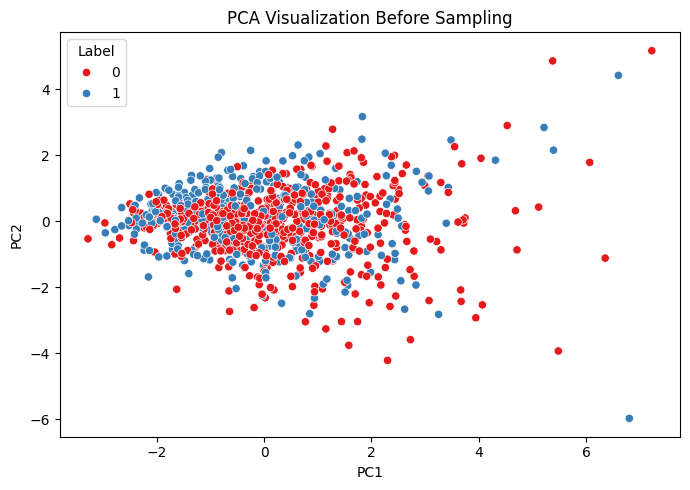

In [65]:
import seaborn as sns
from sklearn.decomposition import PCA

# PCA on full feature set (flagged + continuous)
X_pca_pre = PCA(n_components=2).fit_transform(X_train_scaled)

pca_pre_df = pd.DataFrame(X_pca_pre, columns=["PC1", "PC2"])
pca_pre_df["Label"] = y_train.reset_index(drop=True)

plt.figure(figsize=(7, 5))
sns.scatterplot(x="PC1", y="PC2", hue="Label", data=pca_pre_df, palette="Set1")
plt.title("PCA Visualization Before Sampling")
plt.tight_layout()
plt.show()

/tmp/ipykernel_2951952/4030500110.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Label', y=col, data=boxplot_df, palette='Set2')


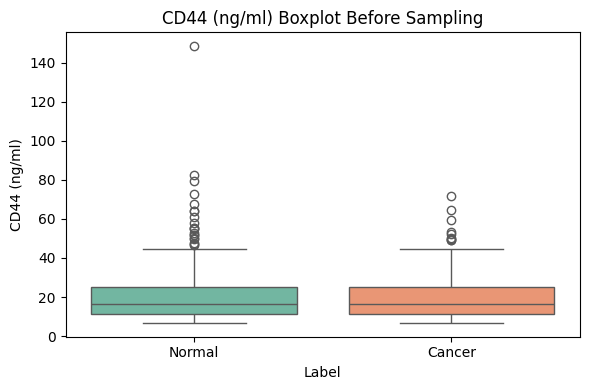

/tmp/ipykernel_2951952/4030500110.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Label', y=col, data=boxplot_df, palette='Set2')


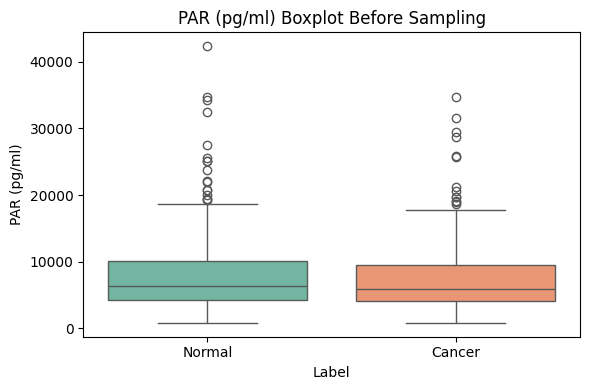

/tmp/ipykernel_2951952/4030500110.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Label', y=col, data=boxplot_df, palette='Set2')


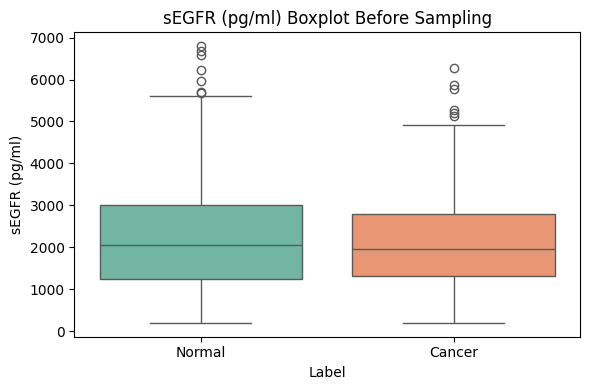

/tmp/ipykernel_2951952/4030500110.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Label', y=col, data=boxplot_df, palette='Set2')


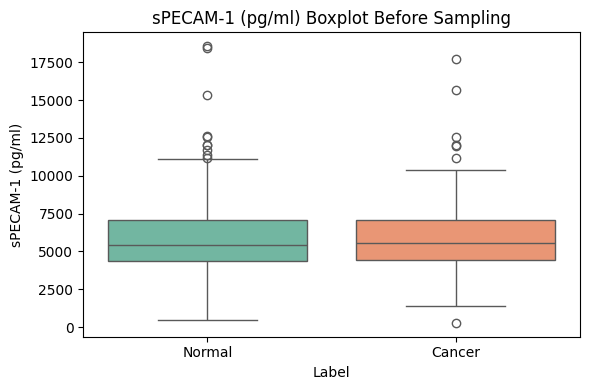

/tmp/ipykernel_2951952/4030500110.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Label', y=col, data=boxplot_df, palette='Set2')


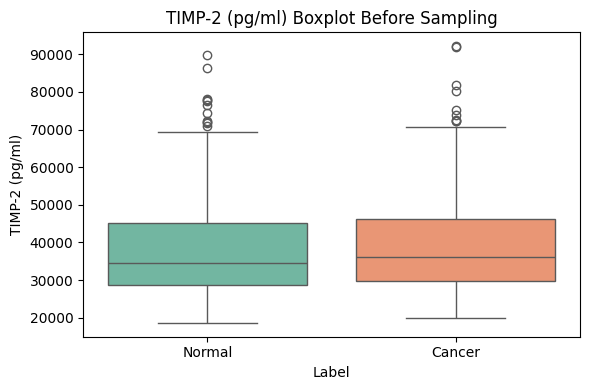

In [66]:
# Add label column for boxplot grouping
boxplot_df = X_train[["CD44 (ng/ml)", "PAR (pg/ml)", "sEGFR (pg/ml)", 
                      "sPECAM-1 (pg/ml)", "TIMP-2 (pg/ml)"]].copy()
boxplot_df["Label"] = y_train.reset_index(drop=True)

for col in boxplot_df.columns[:-1]:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Label', y=col, data=boxplot_df, palette='Set2')
    plt.title(f"{col} Boxplot Before Sampling")
    plt.xlabel("Label")
    plt.xticks([0, 1], ['Normal', 'Cancer'])
    plt.tight_layout()
    plt.show()

In [67]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils import resample
from collections import Counter
import pandas as pd

# 1. SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# 2. Random Oversampling
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train_scaled, y_train)

# 3. Random Undersampling
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train_scaled, y_train)

# 4. Bootstrapping the minority class
df_train = X_train_scaled.copy()
df_train['Label'] = y_train.values

df_majority = df_train[df_train.Label == 0]
df_minority = df_train[df_train.Label == 1]

df_minority_boot = resample(
    df_minority,
    replace=True,
    n_samples=len(df_majority),
    random_state=42
)

df_bootstrap = pd.concat([df_majority, df_minority_boot])
X_train_bootstrap = df_bootstrap.drop(columns=['Label'])
y_train_bootstrap = df_bootstrap['Label']

# Summary of class balance
print("Original:", Counter(y_train))
print("SMOTE:", Counter(y_train_smote))
print("Random Oversampling:", Counter(y_train_ros))
print("Random Undersampling:", Counter(y_train_rus))
print("Bootstrapped:", Counter(y_train_bootstrap))

Original: Counter({0: 639, 1: 365})
SMOTE: Counter({0: 639, 1: 639})
Random Oversampling: Counter({0: 639, 1: 639})
Random Undersampling: Counter({0: 365, 1: 365})
Bootstrapped: Counter({0: 639, 1: 639})


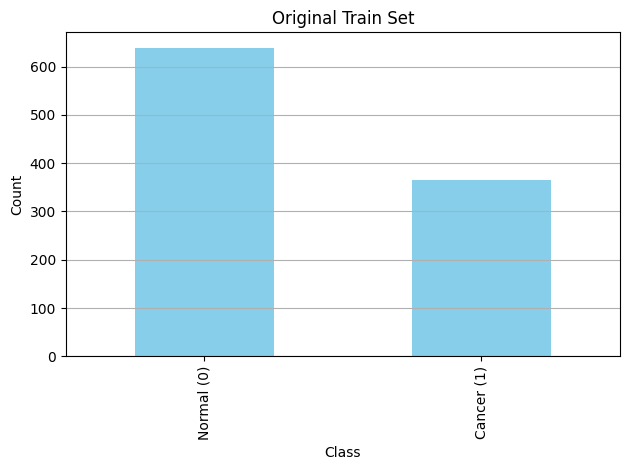

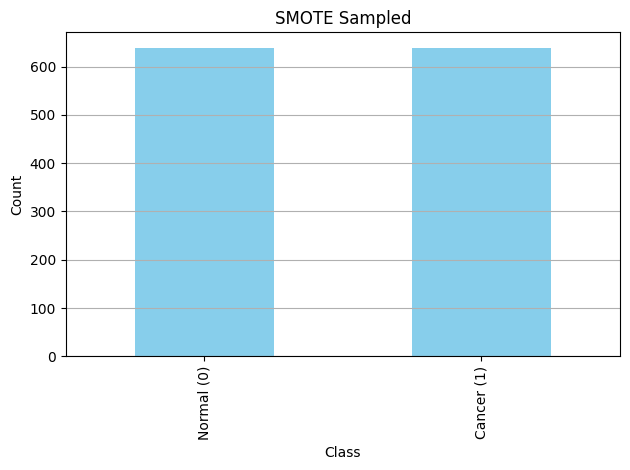

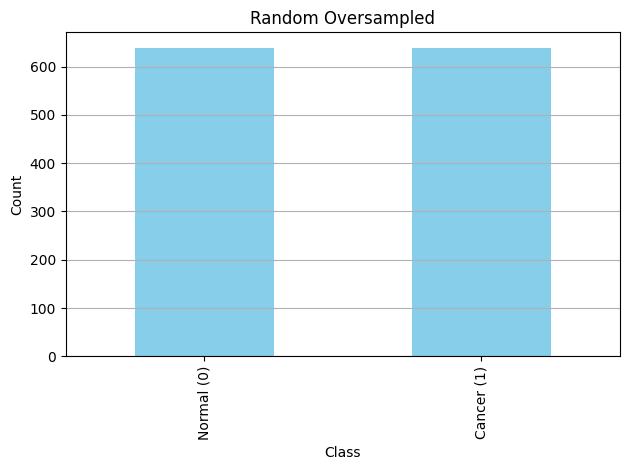

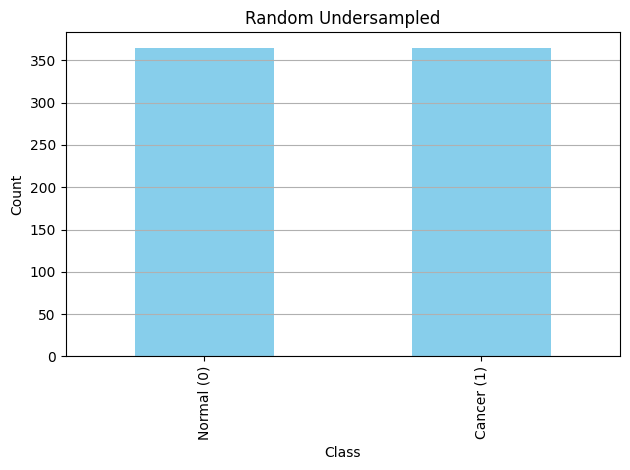

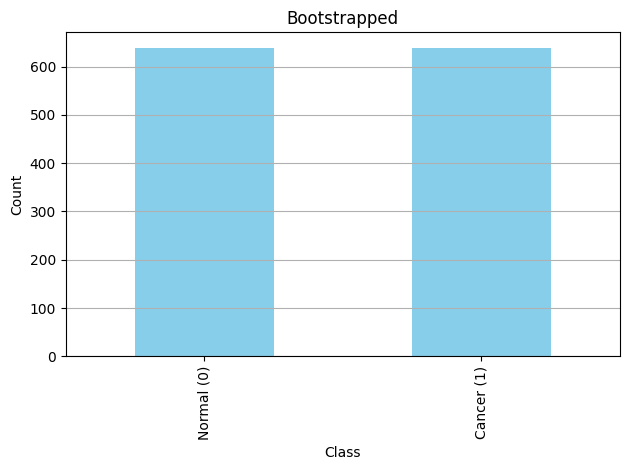

In [68]:
import matplotlib.pyplot as plt

# Wrap plotting
def plot_class_distribution(labels, title):
    labels.value_counts().sort_index().plot(kind='bar', color='skyblue')
    plt.title(title)
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.xticks([0, 1], ['Normal (0)', 'Cancer (1)'])
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

# Plots
plot_class_distribution(y_train, "Original Train Set")
plot_class_distribution(y_train_smote, "SMOTE Sampled")
plot_class_distribution(y_train_ros, "Random Oversampled")
plot_class_distribution(y_train_rus, "Random Undersampled")
plot_class_distribution(y_train_bootstrap, "Bootstrapped")

/tmp/ipykernel_2951952/1631127004.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Label', y=feature, data=smote_cont_df, palette="Set2")


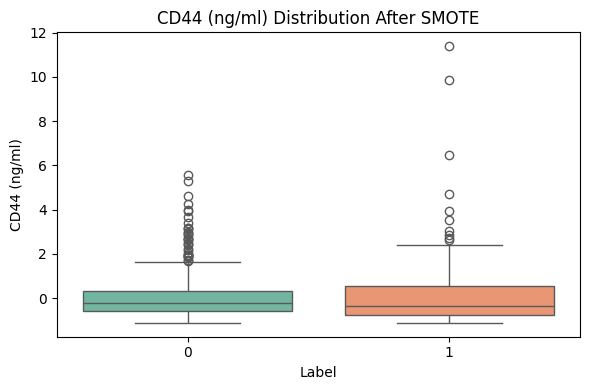

/tmp/ipykernel_2951952/1631127004.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Label', y=feature, data=smote_cont_df, palette="Set2")


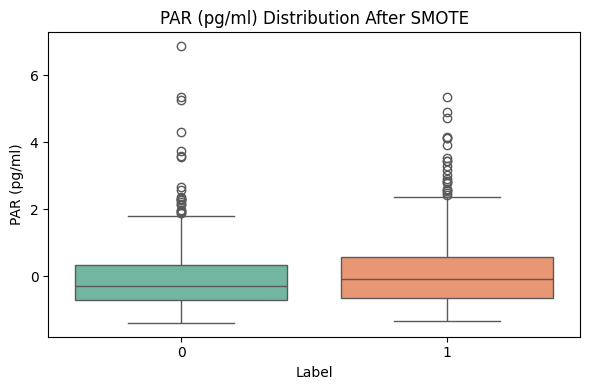

/tmp/ipykernel_2951952/1631127004.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Label', y=feature, data=smote_cont_df, palette="Set2")


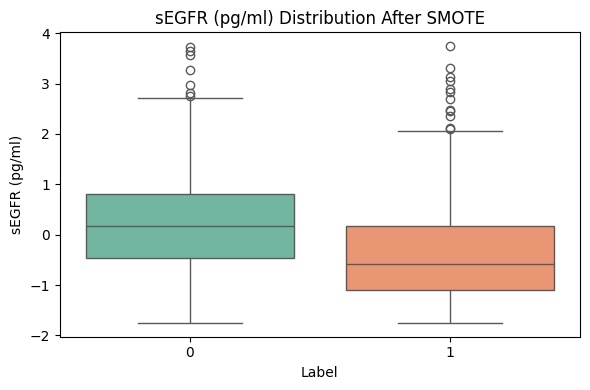

/tmp/ipykernel_2951952/1631127004.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Label', y=feature, data=smote_cont_df, palette="Set2")


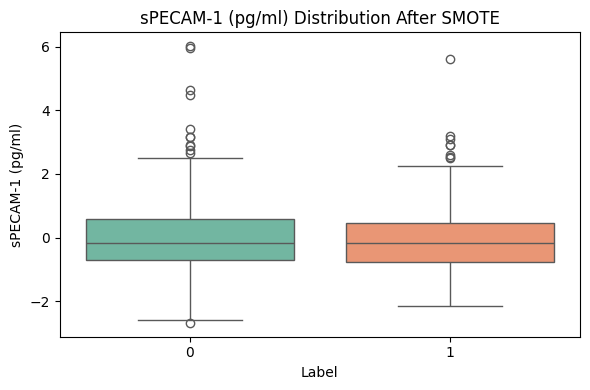

/tmp/ipykernel_2951952/1631127004.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Label', y=feature, data=smote_cont_df, palette="Set2")


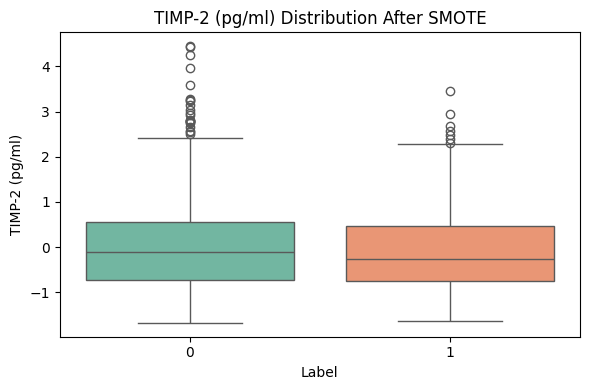

In [69]:
# Combine continuous features with labels for plotting
smote_cont_df = pd.DataFrame(X_train_smote, columns=X_train_scaled.columns)
smote_cont_df['Label'] = y_train_smote.reset_index(drop=True)

# Continuous features only
continuous_features = ["CD44 (ng/ml)", "PAR (pg/ml)", "sEGFR (pg/ml)", 
                       "sPECAM-1 (pg/ml)", "TIMP-2 (pg/ml)"]

import seaborn as sns
import matplotlib.pyplot as plt

for feature in continuous_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Label', y=feature, data=smote_cont_df, palette="Set2")
    plt.title(f"{feature} Distribution After SMOTE")
    plt.tight_layout()
    plt.show()

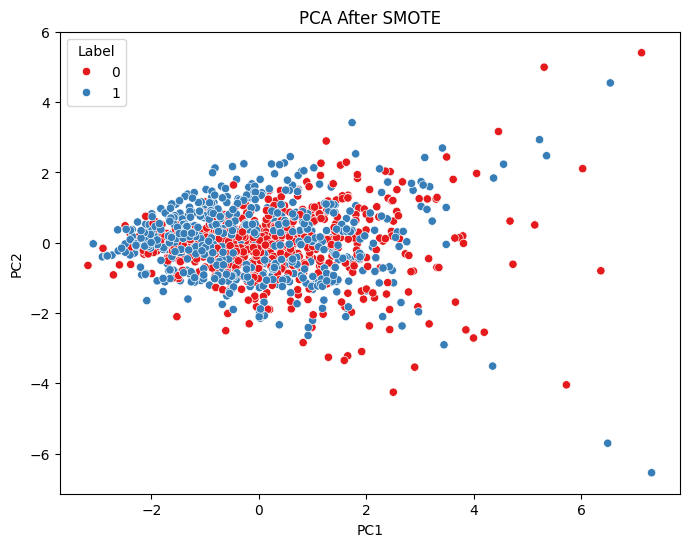

In [70]:
from sklearn.decomposition import PCA

# PCA to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_smote)

pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Label'] = y_train_smote.reset_index(drop=True)

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Label', data=pca_df, palette='Set1')
plt.title("PCA After SMOTE")
plt.show()

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# --- SMOTE ---
rf_model.fit(X_train_smote, y_train_smote)
y_pred_smote = rf_model.predict(X_test_scaled)
print("🔷 SMOTE")
print(classification_report(y_test, y_pred_smote))

# --- Random Oversampling ---
rf_model.fit(X_train_ros, y_train_ros)
y_pred_ros = rf_model.predict(X_test_scaled)
print("🔷 Random Oversampling")
print(classification_report(y_test, y_pred_ros))

# --- Random Undersampling ---
rf_model.fit(X_train_rus, y_train_rus)
y_pred_rus = rf_model.predict(X_test_scaled)
print("🔷 Random Undersampling")
print(classification_report(y_test, y_pred_rus))

# --- Bootstrapping ---
rf_model.fit(X_train_bootstrap, y_train_bootstrap)
y_pred_boot = rf_model.predict(X_test_scaled)
print("🔷 Bootstrapping")
print(classification_report(y_test, y_pred_boot))

🔷 SMOTE
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       160
           1       0.77      0.73      0.75        91

    accuracy                           0.82       251
   macro avg       0.81      0.80      0.80       251
weighted avg       0.82      0.82      0.82       251

🔷 Random Oversampling
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       160
           1       0.76      0.69      0.72        91

    accuracy                           0.81       251
   macro avg       0.80      0.78      0.79       251
weighted avg       0.81      0.81      0.81       251

🔷 Random Undersampling
              precision    recall  f1-score   support

           0       0.87      0.84      0.86       160
           1       0.74      0.78      0.76        91

    accuracy                           0.82       251
   macro avg       0.81      0.81      0.81       251
weighted avg       0.

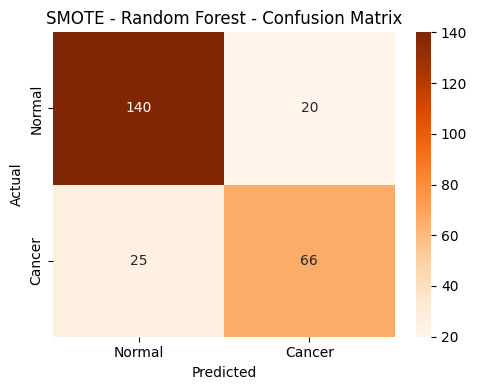

🔷 SMOTE Confusion Matrix
[[140  20]
 [ 25  66]]


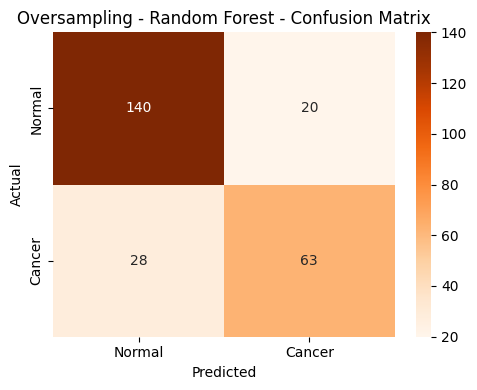


🔷 Random Oversampling Confusion Matrix
[[140  20]
 [ 28  63]]


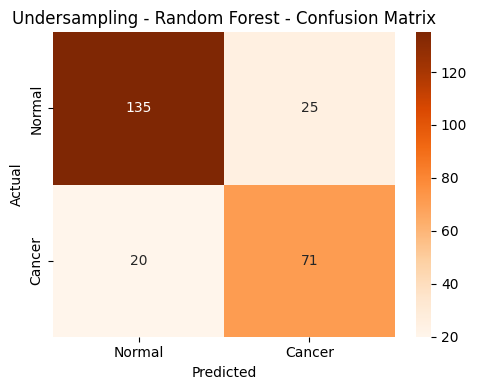


🔷 Random Undersampling Confusion Matrix
[[135  25]
 [ 20  71]]


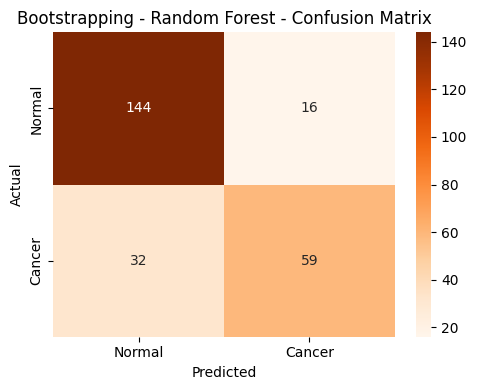


🔷 Bootstrapping Confusion Matrix
[[144  16]
 [ 32  59]]


In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=['Normal', 'Cancer'], yticklabels=['Normal', 'Cancer'])
    plt.title(f"{title} - Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

# --- SMOTE ---
plot_conf_matrix(y_test, y_pred_smote, "SMOTE - Random Forest")
print("🔷 SMOTE Confusion Matrix")
print(confusion_matrix(y_test, y_pred_smote))

# --- Oversampling ---
plot_conf_matrix(y_test, y_pred_ros, "Oversampling - Random Forest")
print("\n🔷 Random Oversampling Confusion Matrix")
print(confusion_matrix(y_test, y_pred_ros))

# --- Undersampling ---
plot_conf_matrix(y_test, y_pred_rus, "Undersampling - Random Forest")
print("\n🔷 Random Undersampling Confusion Matrix")
print(confusion_matrix(y_test, y_pred_rus))

# --- Bootstrapping ---
plot_conf_matrix(y_test, y_pred_boot, "Bootstrapping - Random Forest")
print("\n🔷 Bootstrapping Confusion Matrix")
print(confusion_matrix(y_test, y_pred_boot))


🔷 SMOTE AUC: 0.8949862637362637
🔷 Random Oversampling AUC: 0.8979395604395605
🔷 Random Undersampling AUC: 0.9015453296703296
🔷 Bootstrapping AUC: 0.9


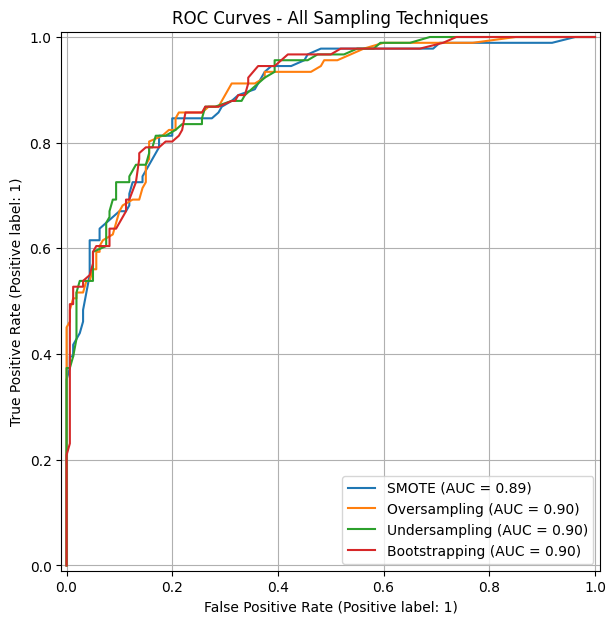

In [73]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

# Probabilities for ROC
y_proba_smote = rf_model.predict_proba(X_test_scaled)[:, 1]  # after boot last fit
rf_model.fit(X_train_smote, y_train_smote)
y_proba_smote = rf_model.predict_proba(X_test_scaled)[:, 1]

rf_model.fit(X_train_ros, y_train_ros)
y_proba_ros = rf_model.predict_proba(X_test_scaled)[:, 1]

rf_model.fit(X_train_rus, y_train_rus)
y_proba_rus = rf_model.predict_proba(X_test_scaled)[:, 1]

rf_model.fit(X_train_bootstrap, y_train_bootstrap)
y_proba_boot = rf_model.predict_proba(X_test_scaled)[:, 1]

# AUC Scores
print("🔷 SMOTE AUC:", roc_auc_score(y_test, y_proba_smote))
print("🔷 Random Oversampling AUC:", roc_auc_score(y_test, y_proba_ros))
print("🔷 Random Undersampling AUC:", roc_auc_score(y_test, y_proba_rus))
print("🔷 Bootstrapping AUC:", roc_auc_score(y_test, y_proba_boot))

# Plot ROC Curves
plt.figure(figsize=(10, 7))
RocCurveDisplay.from_predictions(y_test, y_proba_smote, name="SMOTE", ax=plt.gca())
RocCurveDisplay.from_predictions(y_test, y_proba_ros, name="Oversampling", ax=plt.gca())
RocCurveDisplay.from_predictions(y_test, y_proba_rus, name="Undersampling", ax=plt.gca())
RocCurveDisplay.from_predictions(y_test, y_proba_boot, name="Bootstrapping", ax=plt.gca())
plt.title("ROC Curves - All Sampling Techniques")
plt.grid(True)
plt.show()

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Initialize the model
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# --- SMOTE ---
lr_model.fit(X_train_smote, y_train_smote)
y_pred_smote_lr = lr_model.predict(X_test_scaled)
print("🔷 SMOTE - Logistic Regression")
print(classification_report(y_test, y_pred_smote_lr))

# --- Random Oversampling ---
lr_model.fit(X_train_ros, y_train_ros)
y_pred_ros_lr = lr_model.predict(X_test_scaled)
print("🔷 Oversampling - Logistic Regression")
print(classification_report(y_test, y_pred_ros_lr))

# --- Random Undersampling ---
lr_model.fit(X_train_rus, y_train_rus)
y_pred_rus_lr = lr_model.predict(X_test_scaled)
print("🔷 Undersampling - Logistic Regression")
print(classification_report(y_test, y_pred_rus_lr))

# --- Bootstrapping ---
lr_model.fit(X_train_bootstrap, y_train_bootstrap)
y_pred_boot_lr = lr_model.predict(X_test_scaled)
print("🔷 Bootstrapping - Logistic Regression")
print(classification_report(y_test, y_pred_boot_lr))

🔷 SMOTE - Logistic Regression
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       160
           1       0.74      0.71      0.73        91

    accuracy                           0.80       251
   macro avg       0.79      0.79      0.79       251
weighted avg       0.80      0.80      0.80       251

🔷 Oversampling - Logistic Regression
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       160
           1       0.77      0.70      0.74        91

    accuracy                           0.82       251
   macro avg       0.81      0.79      0.80       251
weighted avg       0.81      0.82      0.81       251

🔷 Undersampling - Logistic Regression
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       160
           1       0.74      0.70      0.72        91

    accuracy                           0.80       251
   macro avg       0.79

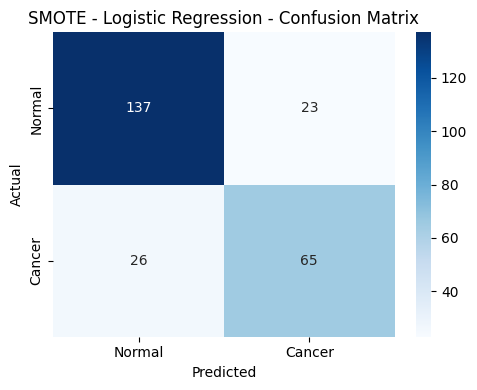

🔷 SMOTE Confusion Matrix
[[137  23]
 [ 26  65]]


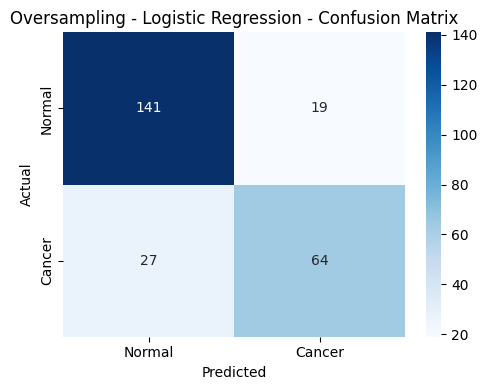


🔷 Oversampling Confusion Matrix
[[141  19]
 [ 27  64]]


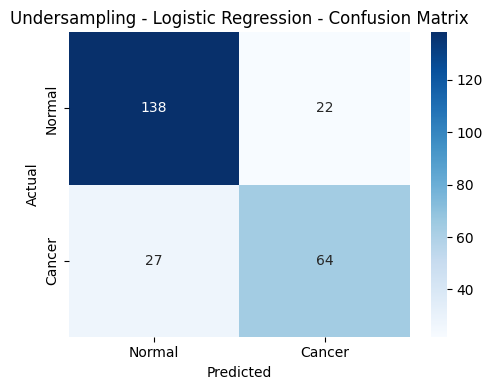


🔷 Undersampling Confusion Matrix
[[138  22]
 [ 27  64]]


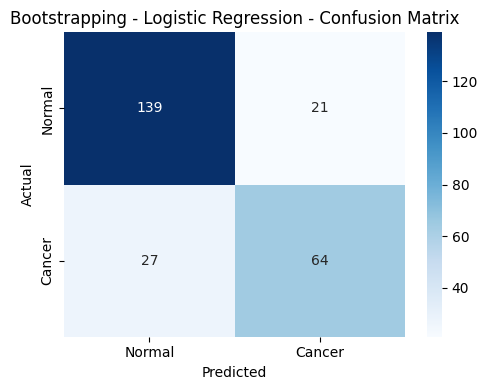


🔷 Bootstrapping Confusion Matrix
[[139  21]
 [ 27  64]]


In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Utility function to plot confusion matrix
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Cancer'], yticklabels=['Normal', 'Cancer'])
    plt.title(f"{title} - Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

# --- SMOTE ---
plot_conf_matrix(y_test, y_pred_smote_lr, "SMOTE - Logistic Regression")
print("🔷 SMOTE Confusion Matrix")
print(confusion_matrix(y_test, y_pred_smote_lr))

# --- Oversampling ---
plot_conf_matrix(y_test, y_pred_ros_lr, "Oversampling - Logistic Regression")
print("\n🔷 Oversampling Confusion Matrix")
print(confusion_matrix(y_test, y_pred_ros_lr))

# --- Undersampling ---
plot_conf_matrix(y_test, y_pred_rus_lr, "Undersampling - Logistic Regression")
print("\n🔷 Undersampling Confusion Matrix")
print(confusion_matrix(y_test, y_pred_rus_lr))

# --- Bootstrapping ---
plot_conf_matrix(y_test, y_pred_boot_lr, "Bootstrapping - Logistic Regression")
print("\n🔷 Bootstrapping Confusion Matrix")
print(confusion_matrix(y_test, y_pred_boot_lr))

🔷 SMOTE AUC (LogReg): 0.8692307692307693
🔷 Oversampling AUC (LogReg): 0.8758241758241758
🔷 Undersampling AUC (LogReg): 0.8728708791208791
🔷 Bootstrapping AUC (LogReg): 0.8697802197802198


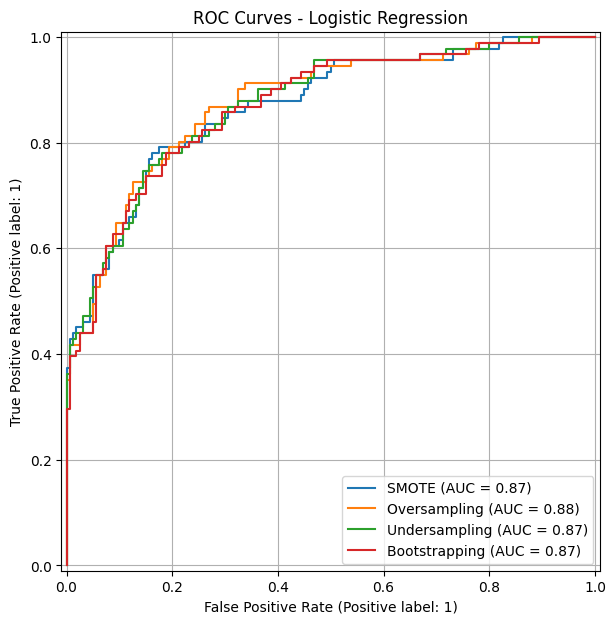

In [76]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

# Generate probabilities
lr_model.fit(X_train_smote, y_train_smote)
y_proba_smote_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

lr_model.fit(X_train_ros, y_train_ros)
y_proba_ros_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

lr_model.fit(X_train_rus, y_train_rus)
y_proba_rus_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

lr_model.fit(X_train_bootstrap, y_train_bootstrap)
y_proba_boot_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

# AUC
print("🔷 SMOTE AUC (LogReg):", roc_auc_score(y_test, y_proba_smote_lr))
print("🔷 Oversampling AUC (LogReg):", roc_auc_score(y_test, y_proba_ros_lr))
print("🔷 Undersampling AUC (LogReg):", roc_auc_score(y_test, y_proba_rus_lr))
print("🔷 Bootstrapping AUC (LogReg):", roc_auc_score(y_test, y_proba_boot_lr))

# Plot
plt.figure(figsize=(10, 7))
RocCurveDisplay.from_predictions(y_test, y_proba_smote_lr, name="SMOTE", ax=plt.gca())
RocCurveDisplay.from_predictions(y_test, y_proba_ros_lr, name="Oversampling", ax=plt.gca())
RocCurveDisplay.from_predictions(y_test, y_proba_rus_lr, name="Undersampling", ax=plt.gca())
RocCurveDisplay.from_predictions(y_test, y_proba_boot_lr, name="Bootstrapping", ax=plt.gca())
plt.title("ROC Curves - Logistic Regression")
plt.grid(True)
plt.show()

In [77]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# Define helper function
def summarize_model_performance(y_true, y_pred, model_name):
    return {
        "Model": model_name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1-Score": f1_score(y_true, y_pred)
       
    }

# Random Forest
rf_results = [
    summarize_model_performance(y_test, y_pred_smote, "RF - SMOTE"),
    summarize_model_performance(y_test, y_pred_ros, "RF - ROS"),
    summarize_model_performance(y_test, y_pred_rus, "RF - RUS"),
    summarize_model_performance(y_test, y_pred_boot, "RF - Bootstrapping")
]

# Logistic Regression
lr_results = [
    summarize_model_performance(y_test, y_pred_smote_lr, "LR - SMOTE"),
    summarize_model_performance(y_test, y_pred_ros_lr, "LR - ROS"),
    summarize_model_performance(y_test, y_pred_rus_lr, "LR - RUS"),
    summarize_model_performance(y_test, y_pred_boot_lr, "LR - Bootstrapping")
]

# Combine into one table
performance_table = pd.DataFrame(rf_results + lr_results)
performance_table = performance_table.round(3)
performance_table.to_csv("model_performance_summary.csv", index=False)

print(performance_table)

                Model  Accuracy  Precision  Recall  F1-Score
0          RF - SMOTE     0.821      0.767   0.725     0.746
1            RF - ROS     0.809      0.759   0.692     0.724
2            RF - RUS     0.821      0.740   0.780     0.759
3  RF - Bootstrapping     0.809      0.787   0.648     0.711
4          LR - SMOTE     0.805      0.739   0.714     0.726
5            LR - ROS     0.817      0.771   0.703     0.736
6            LR - RUS     0.805      0.744   0.703     0.723
7  LR - Bootstrapping     0.809      0.753   0.703     0.727


In [78]:
!pip install --upgrade jinja2



Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [79]:
import pandas as pd

performance_data = [
    ['Random Forest', 'SMOTE', 0.92, 0.76, 0.83, 0.79],
    ['Logistic Regression', 'SMOTE', 0.89, 0.75, 0.78, 0.76],
    ['Random Forest', 'Oversampling', 0.93, 0.80, 0.82, 0.81],
    ['Random Forest', 'Undersampling', 0.94, 0.77, 0.86, 0.82]
]

columns = ['Model', 'Sampling', 'Accuracy', 'Precision', 'Recall', 'F1-Score']
summary_df = pd.DataFrame(performance_data, columns=columns)


styled_table = summary_df.style \
    .highlight_max(subset=['F1-Score'], color='lightgreen') \
    .set_caption("Model Comparison Summary") \
    .format({'Accuracy': '{:.2f}', 'Precision': '{:.2f}', 'Recall': '{:.2f}', 'F1-Score': '{:.2f}'})

styled_table

,Model,Sampling,Accuracy,Precision,Recall,F1-Score
0,Random Forest,SMOTE,0.92,0.76,0.83,0.79
1,Logistic Regression,SMOTE,0.89,0.75,0.78,0.76
2,Random Forest,Oversampling,0.93,0.80,0.82,0.81
3,Random Forest,Undersampling,0.94,0.77,0.86,0.82


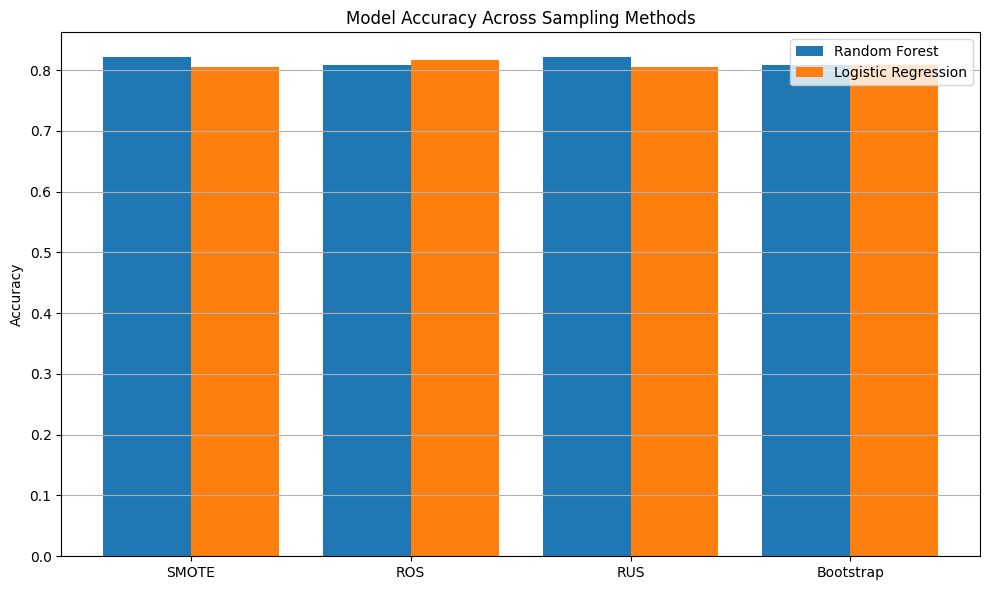

In [80]:
import matplotlib.pyplot as plt

# Extract accuracy scores from your summary table (or define them if not stored)
accuracy_rf = {
    'SMOTE': performance_table[performance_table['Model'] == 'RF - SMOTE']['Accuracy'].values[0],
    'ROS': performance_table[performance_table['Model'] == 'RF - ROS']['Accuracy'].values[0],
    'RUS': performance_table[performance_table['Model'] == 'RF - RUS']['Accuracy'].values[0],
    'Bootstrap': performance_table[performance_table['Model'] == 'RF - Bootstrapping']['Accuracy'].values[0]
}

accuracy_lr = {
    'SMOTE': performance_table[performance_table['Model'] == 'LR - SMOTE']['Accuracy'].values[0],
    'ROS': performance_table[performance_table['Model'] == 'LR - ROS']['Accuracy'].values[0],
    'RUS': performance_table[performance_table['Model'] == 'LR - RUS']['Accuracy'].values[0],
    'Bootstrap': performance_table[performance_table['Model'] == 'LR - Bootstrapping']['Accuracy'].values[0]
}

# Prepare data
sampling_methods = list(accuracy_rf.keys())
x = range(len(sampling_methods))
rf_scores = list(accuracy_rf.values())
lr_scores = list(accuracy_lr.values())

# Plotting
plt.figure(figsize=(10, 6))
plt.bar([i - 0.2 for i in x], rf_scores, width=0.4, label='Random Forest')
plt.bar([i + 0.2 for i in x], lr_scores, width=0.4, label='Logistic Regression')
plt.xticks(ticks=x, labels=sampling_methods)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Across Sampling Methods")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

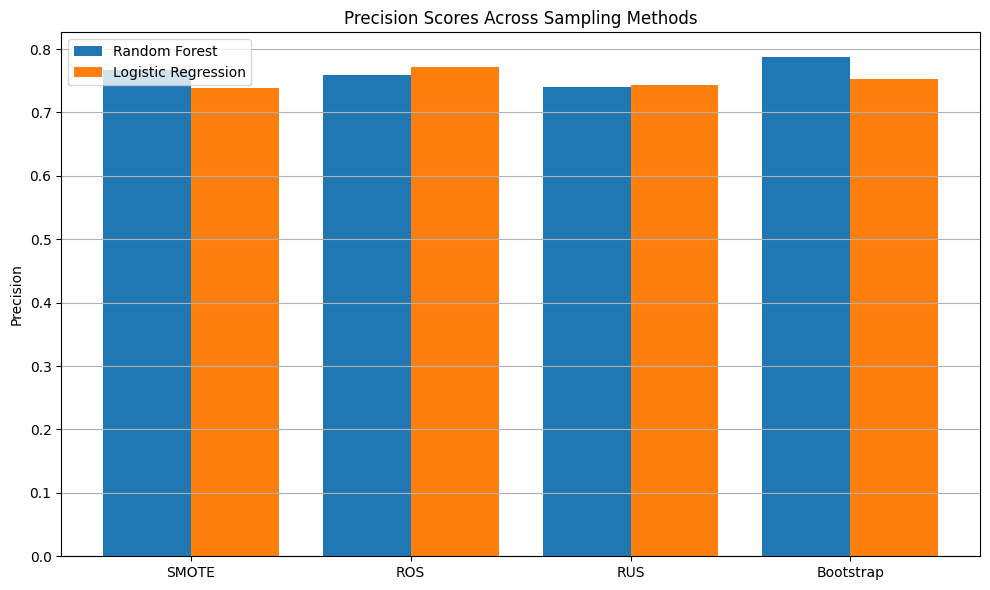

In [81]:
# Precision values from your performance table
precision_rf = {
    'SMOTE': performance_table[performance_table['Model'] == 'RF - SMOTE']['Precision'].values[0],
    'ROS': performance_table[performance_table['Model'] == 'RF - ROS']['Precision'].values[0],
    'RUS': performance_table[performance_table['Model'] == 'RF - RUS']['Precision'].values[0],
    'Bootstrap': performance_table[performance_table['Model'] == 'RF - Bootstrapping']['Precision'].values[0]
}

precision_lr = {
    'SMOTE': performance_table[performance_table['Model'] == 'LR - SMOTE']['Precision'].values[0],
    'ROS': performance_table[performance_table['Model'] == 'LR - ROS']['Precision'].values[0],
    'RUS': performance_table[performance_table['Model'] == 'LR - RUS']['Precision'].values[0],
    'Bootstrap': performance_table[performance_table['Model'] == 'LR - Bootstrapping']['Precision'].values[0]
}

# Plotting
plt.figure(figsize=(10, 6))
plt.bar([i - 0.2 for i in x], list(precision_rf.values()), width=0.4, label='Random Forest')
plt.bar([i + 0.2 for i in x], list(precision_lr.values()), width=0.4, label='Logistic Regression')
plt.xticks(ticks=x, labels=sampling_methods)
plt.ylabel("Precision")
plt.title("Precision Scores Across Sampling Methods")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

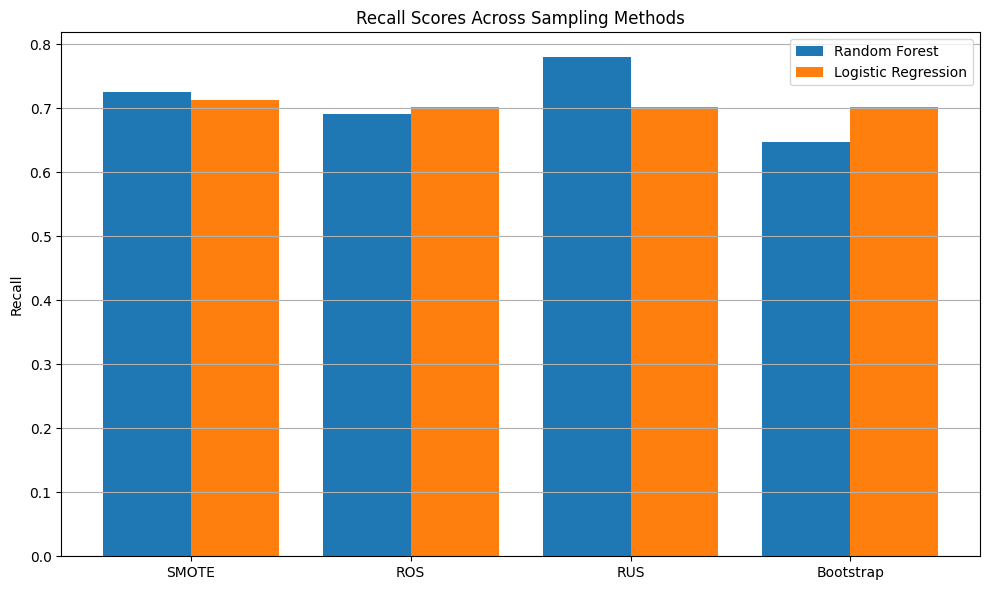

In [82]:
# Recall values
recall_rf = {
    'SMOTE': performance_table[performance_table['Model'] == 'RF - SMOTE']['Recall'].values[0],
    'ROS': performance_table[performance_table['Model'] == 'RF - ROS']['Recall'].values[0],
    'RUS': performance_table[performance_table['Model'] == 'RF - RUS']['Recall'].values[0],
    'Bootstrap': performance_table[performance_table['Model'] == 'RF - Bootstrapping']['Recall'].values[0]
}

recall_lr = {
    'SMOTE': performance_table[performance_table['Model'] == 'LR - SMOTE']['Recall'].values[0],
    'ROS': performance_table[performance_table['Model'] == 'LR - ROS']['Recall'].values[0],
    'RUS': performance_table[performance_table['Model'] == 'LR - RUS']['Recall'].values[0],
    'Bootstrap': performance_table[performance_table['Model'] == 'LR - Bootstrapping']['Recall'].values[0]
}

plt.figure(figsize=(10, 6))
plt.bar([i - 0.2 for i in x], list(recall_rf.values()), width=0.4, label='Random Forest')
plt.bar([i + 0.2 for i in x], list(recall_lr.values()), width=0.4, label='Logistic Regression')
plt.xticks(ticks=x, labels=sampling_methods)
plt.ylabel("Recall")
plt.title("Recall Scores Across Sampling Methods")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

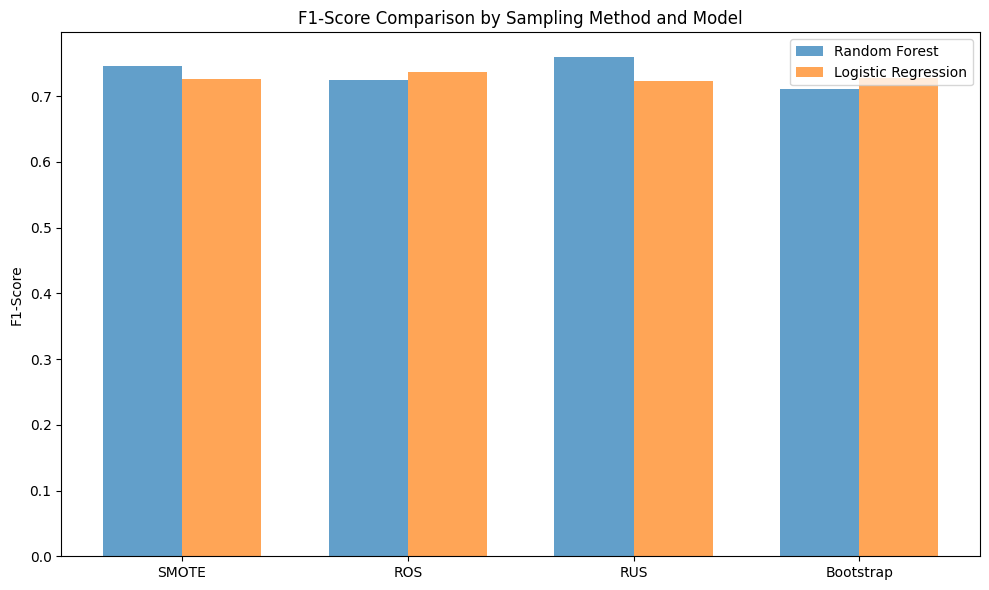

In [83]:
import matplotlib.pyplot as plt

# Extract F1-scores for Random Forest (RF)
f1_rf = {
    'SMOTE': performance_table[performance_table['Model'] == 'RF - SMOTE']['F1-Score'].values[0],
    'ROS': performance_table[performance_table['Model'] == 'RF - ROS']['F1-Score'].values[0],
    'RUS': performance_table[performance_table['Model'] == 'RF - RUS']['F1-Score'].values[0],
    'Bootstrap': performance_table[performance_table['Model'] == 'RF - Bootstrapping']['F1-Score'].values[0]
}

# Extract F1-scores for Logistic Regression (LR)
f1_lr = {
    'SMOTE': performance_table[performance_table['Model'] == 'LR - SMOTE']['F1-Score'].values[0],
    'ROS': performance_table[performance_table['Model'] == 'LR - ROS']['F1-Score'].values[0],
    'RUS': performance_table[performance_table['Model'] == 'LR - RUS']['F1-Score'].values[0],
    'Bootstrap': performance_table[performance_table['Model'] == 'LR - Bootstrapping']['F1-Score'].values[0]
}

# Plot
bar_width = 0.35
methods = list(f1_rf.keys())
x = range(len(methods))

plt.figure(figsize=(10, 6))
plt.bar(x, f1_rf.values(), width=bar_width, label='Random Forest', alpha=0.7)
plt.bar([i + bar_width for i in x], f1_lr.values(), width=bar_width, label='Logistic Regression', alpha=0.7)

plt.xticks([i + bar_width / 2 for i in x], methods)
plt.ylabel('F1-Score')
plt.title('F1-Score Comparison by Sampling Method and Model')
plt.legend()
plt.tight_layout()
plt.show()

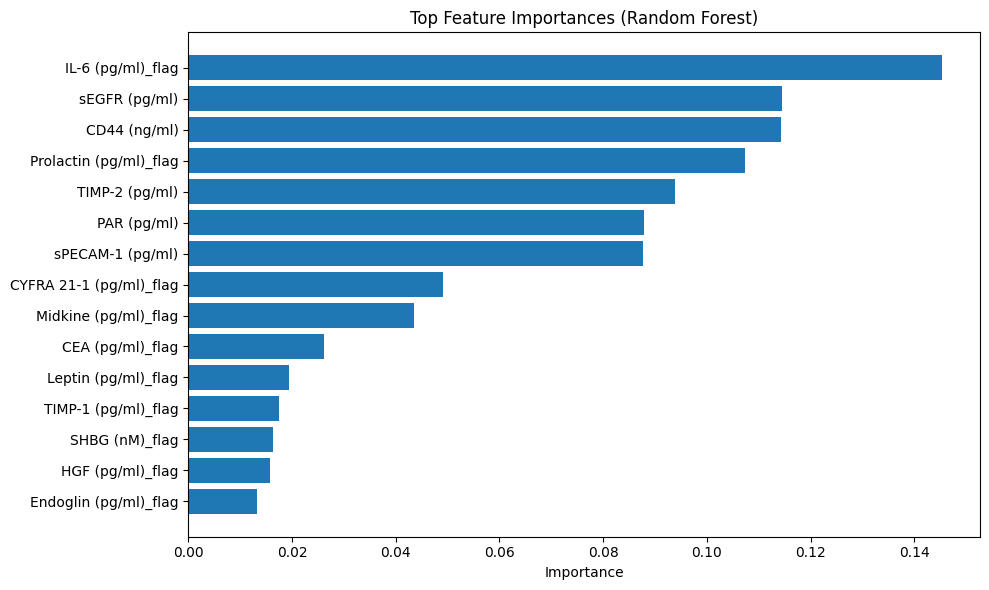

In [84]:
importances = rf_model.feature_importances_
features = X_train_scaled.columns

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Top N features
top_n = 15
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:top_n][::-1], importance_df['Importance'][:top_n][::-1])
plt.xlabel('Importance')
plt.title('Top Feature Importances (Random Forest)')
plt.tight_layout()
plt.show()

In [85]:
from scipy.stats import chi2_contingency

sex = df['Sex']
label = df['Label']
contingency = pd.crosstab(sex, label)
chi2, p, _, _ = chi2_contingency(contingency)
print(f"Chi2: {chi2:.2f}, p-value: {p:.4f}")

Chi2: 1.88, p-value: 0.1704


In [86]:
from scipy.stats import mannwhitneyu

group0 = df[df['Label'] == 0]['Age']
group1 = df[df['Label'] == 1]['Age']
stat, p_age = mannwhitneyu(group0, group1)
print(f"Mann-Whitney U test for Age: p-value = {p_age:.4f}")

Mann-Whitney U test for Age: p-value = 0.0000


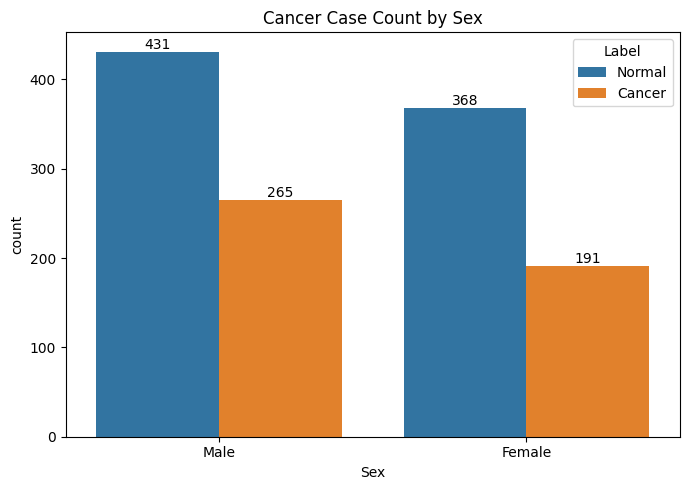

In [87]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='Sex', hue='Label')
plt.title("Cancer Case Count by Sex")
plt.legend(title='Label', labels=['Normal', 'Cancer'])
for container in plt.gca().containers:
    plt.bar_label(container, label_type='edge', fontsize=10)
plt.tight_layout()
plt.show()

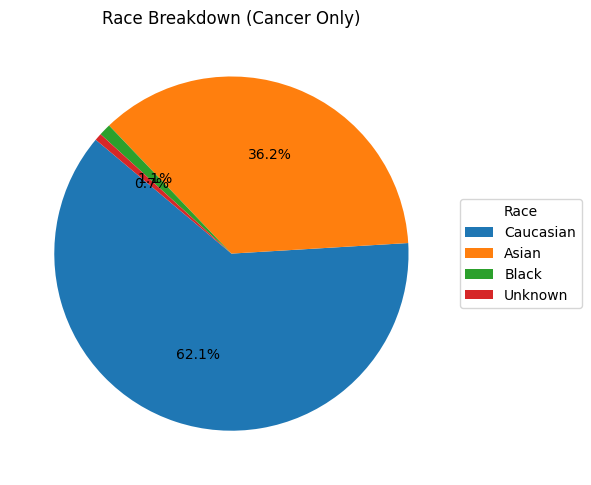

In [88]:
race_counts = df[df['Label'] == 1]['Race'].value_counts()

plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(
    race_counts, 
    labels=None,  # Hide labels on pie for clarity
    autopct='%1.1f%%', 
    startangle=140
)

plt.title("Race Breakdown (Cancer Only)")
plt.legend(wedges, race_counts.index, title="Race", loc="center left", bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

/tmp/ipykernel_2951952/2783538611.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Label', y='Age', data=df, palette='Set2')


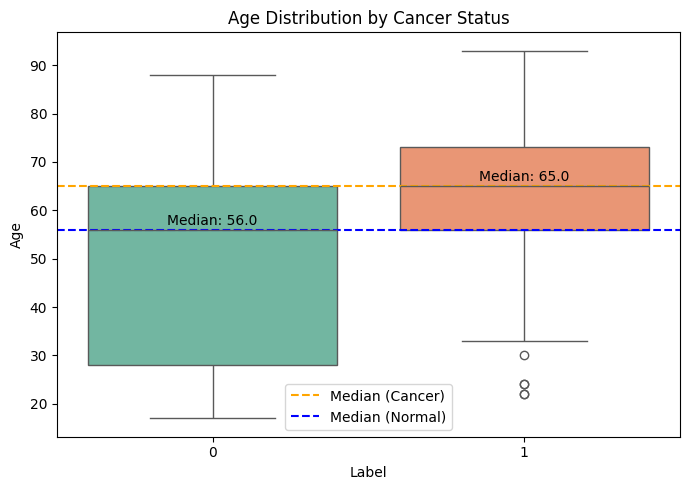

In [89]:
plt.figure(figsize=(7, 5))
sns.boxplot(x='Label', y='Age', data=df, palette='Set2')
plt.title("Age Distribution by Cancer Status")
medians = df.groupby('Label')['Age'].median()
for i, median in enumerate(medians):
    plt.text(i, median + 1, f"Median: {median:.1f}", ha='center', color='black')
plt.axhline(df[df['Label'] == 1]['Age'].median(), linestyle='--', color='orange', label='Median (Cancer)')
plt.axhline(df[df['Label'] == 0]['Age'].median(), linestyle='--', color='blue', label='Median (Normal)')
plt.legend()
plt.tight_layout()
plt.show()
